<a href="https://colab.research.google.com/github/Luke-687/Chemotaxis-With-RL/blob/main/QLearningChemotaxisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import matplotlib.pyplot as plt

#Agent class for everything
class agent:
  def __init__(self, alpha, gamma, epsilon):
    self.alpha=alpha
    self.gamma=gamma
    self.epsilon = epsilon
    self.Qtable = {}
    for i1 in range(0,20):
      for j1 in range(0,20):
        for direction in range(0,8):
          for velocity in range(1,4):
            self.Qtable[((i1,j1),(direction, velocity))] = [0, self.moveForQTable(i1,j1, direction, velocity)] # Added self.
  #Following 3 functions to define Q-table
  def moveForQTable(self, initX, initY, direction, velocity): # Added self
    direction = self.directionKey(direction) # Added self.
    return [(initX + int(math.cos(direction)*velocity)),(initY + int(math.sin(direction)*velocity))]
  def directionKey(self, direction): # Added self
    angle = direction*45
    return angle*math.pi/180
  def reward(self, x,y): # Added self
    fromCenter = math.sqrt((x-9.5)**2+(y-9.5)**2)
    if(fromCenter<=5):
      reward = 10/(fromCenter**1.5)
    elif(int(fromCenter) == 0):
      reward=50
    else:
      reward=-50
    return reward

  def trainQTable(self, trainingEpisodes): # Added self
    trainingRewards = [[],[]]
    for iterations in range(trainingEpisodes):
      totReward=0
      currentX = 0
      currentY = 0
      for steps in range(0,50):
        direction, velocity = max(
            [(d,v) for d in range(8) for v in range(1,4)],
            key=lambda a: self.Qtable[(currentX,currentY),a][0]
        )
        if(random.random()<self.epsilon):
          direction = random.randint(0,7)
          velocity = random.randint(1,3)
        nextPos = self.moveForQTable(currentX, currentY, direction, velocity)
        nextX = max(0, min(19, nextPos[0]))
        nextY = max(0, min(19, nextPos[1]))
        initReward = self.reward(nextX, nextY)
        nextReward = max(
            self.Qtable[(nextX, nextY), (d,v)][0]
            for d in range(8)
            for v in range(1,4)
        )
        self.Qtable[((currentX,currentY),(direction, velocity))][0] = self.Qtable[((currentX,currentY),(direction, velocity))][0] + self.alpha*(initReward + self.gamma*nextReward-self.Qtable[((currentX,currentY),(direction, velocity))][0])
        currentX = nextX
        currentY = nextY
        totReward+=self.Qtable[((currentX,currentY),(direction, velocity))][0] + self.alpha*(initReward + self.gamma*nextReward-self.Qtable[((currentX,currentY),(direction, velocity))][0])
      trainingRewards[0].append(iterations)
      trainingRewards[1].append(totReward)
    return trainingRewards

  def simulate(self, steps): # Added self
    x=[]
    y=[]
    currentX = 0
    currentY = 0
    for steps in range(0,steps):
      currentX = max(0, min(19, currentX))
      currentY = max(0, min(19, currentY))
      x.append(currentX)
      y.append(currentY)
      rewardOption = -100000
      currentX = int(currentX)
      currentY = int(currentY)
      nextPos = [currentX, currentY]
      for direction in range(0,8):
        for velocity in range(1,4):
          testReward = self.Qtable[(currentX, currentY), (direction, velocity)][0]
          if(testReward>=rewardOption):
            rewardOption = testReward
            nextPos = self.Qtable[(currentX, currentY), (direction, velocity)][1]
      currentX = nextPos[0]
      currentY = nextPos[1]
    return x,y

In [ ]:
#Gradient class
class gradient:
  def __init__(self, xSize, ySize):
    self.dimensions = [xSize, ySize]
  def createGradient(self):
    xG =[]
    yG = []
    gradient_values = []
    for x in range(0, self.dimensions[1]+1):
      for y in range(0, self.dimensions[0]+1):
        xG.append(x)
        yG.append(y)
        if(math.sqrt((x-9.5)**2+(y-9.5)**2)<=5):
          if(math.sqrt((x-9.5)**2+(y-9.5)**2)>1):
            gradient_values.append(1/(((x-9.5)**2+(y-9.5)**2)**0.5))
          else:
            gradient_values.append(1)
        else:
          gradient_values.append(0)

    return xG, yG, gradient_values

In [ ]:
#Essential values
alpha =0.99
gamma =0.99
epsilon =0.15

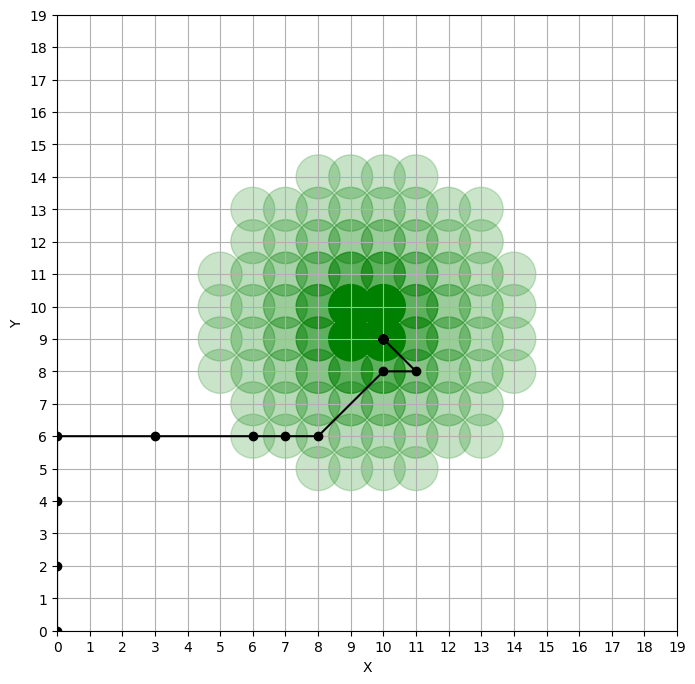

In [ ]:
#Simulate 1 time
plt.figure(figsize=(8, 8))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.xlim(0, 19)
plt.ylim(0, 19)
plt.xticks(range(20))
plt.yticks(range(20))

#Alpha, gamma
testAgent = agent(0.7, 1, 0.15)
trainingData = testAgent.trainQTable(1000)
x, y = testAgent.simulate(25)
plt.plot(x, y, marker='o', linestyle='-', color='black')

chemoGradient = gradient(19,19)
xG, yG, gradientG = chemoGradient.createGradient()
plt.scatter(xG, yG, color = 'green', s=1000, alpha = gradientG)

plt.show()

In [ ]:
#Graph representing average distance from center from steps 0-25 in the model simulation (graph averages over 1000 steps)
step = []
dist = []
distance = 0
for i in range(1,26):
  step.append(i)
  dist.append(0)
for i in range(1000):
  testAgent = agent(alpha, gamma, epsilon)
  trainingData = testAgent.trainQTable(100)
  x, y = testAgent.simulate(25)
  for steps in range(0, len(x)):
    distance = math.sqrt((x[steps]-9.5)**2+(y[steps]-9.5)**2)
    dist[steps] += distance/1000

#Plot the results of the step vs distance from center
plt.xlabel('Steps Made')
plt.ylabel('Distance From Center')
plt.plot(step, dist, color = 'blue')

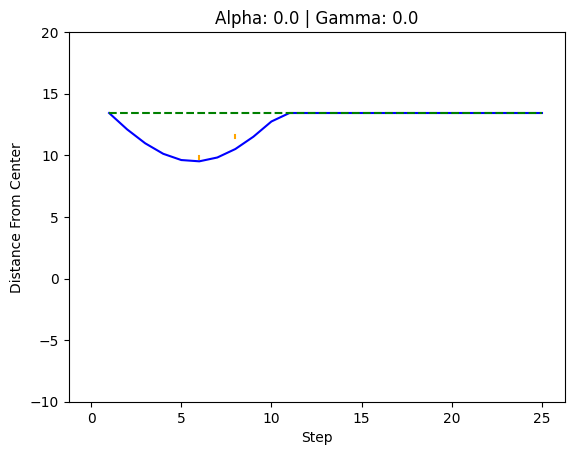

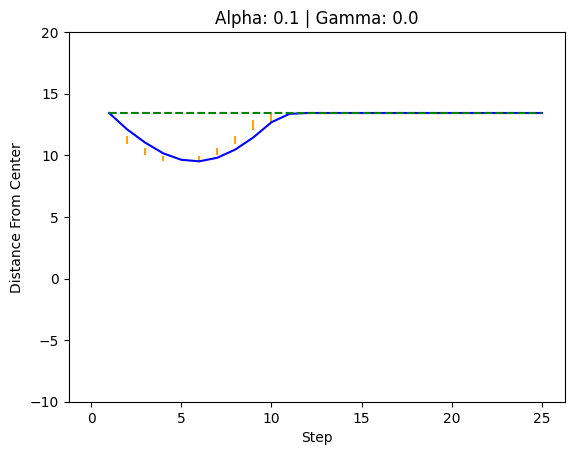

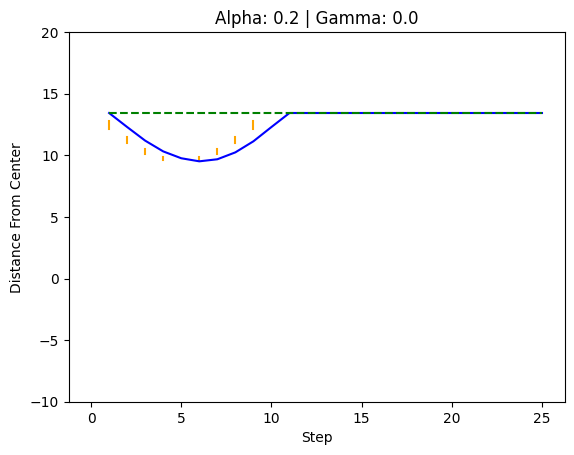

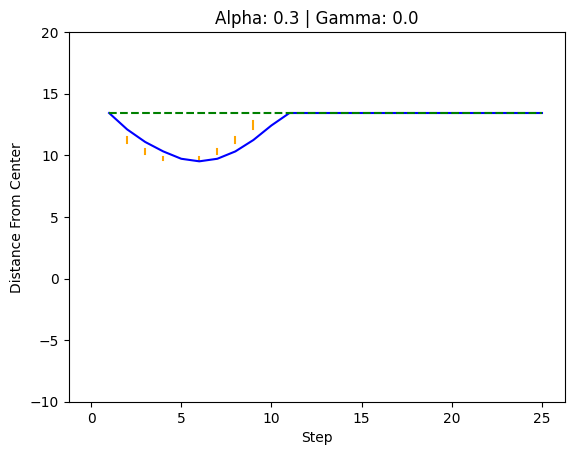

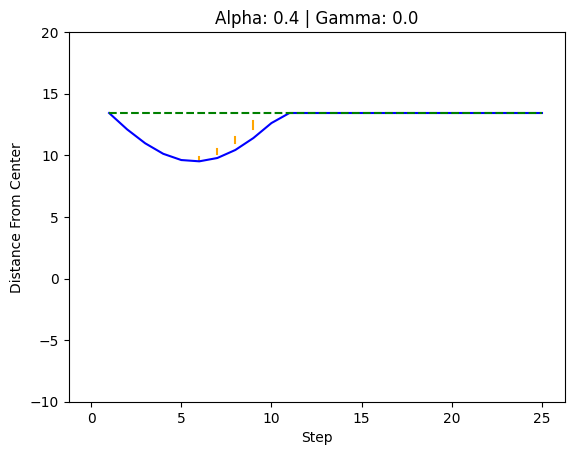

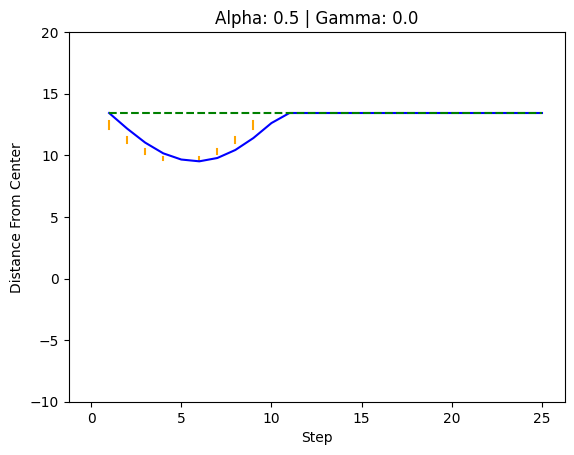

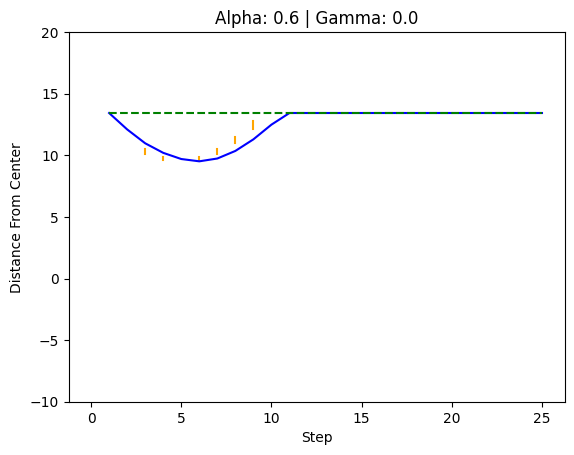

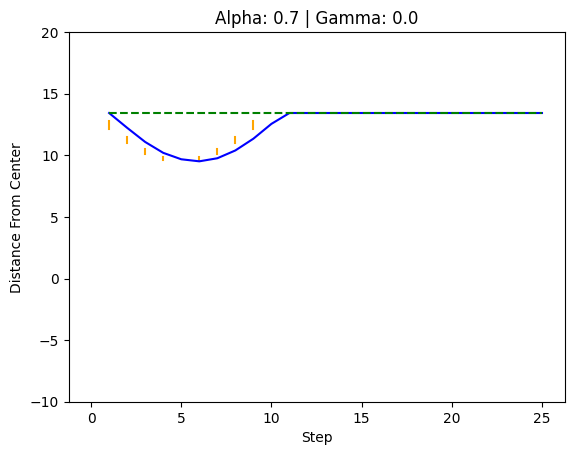

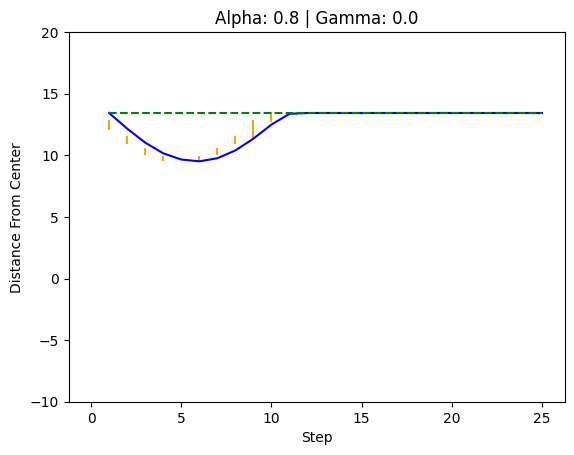

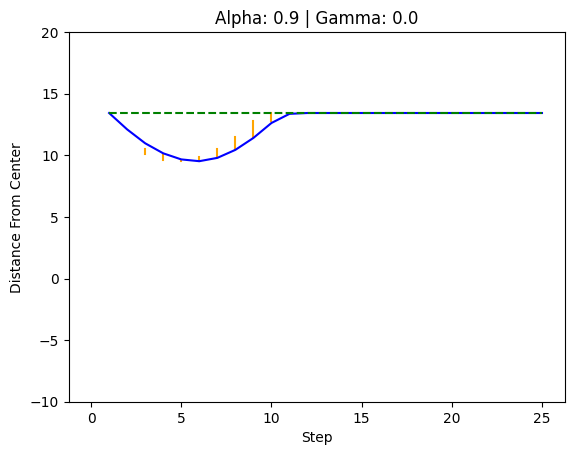

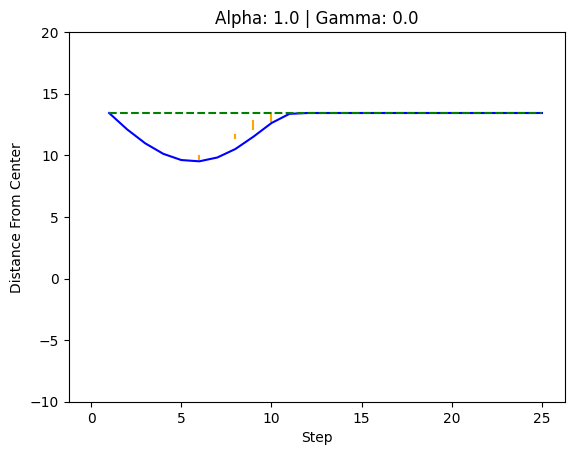

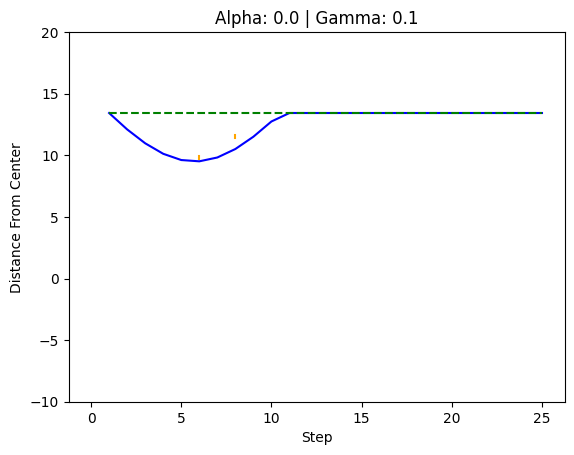

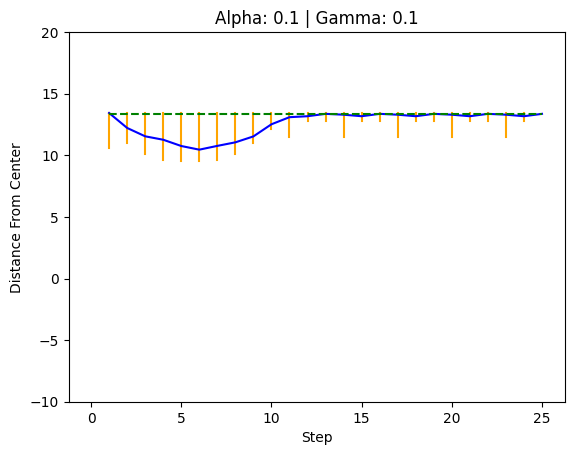

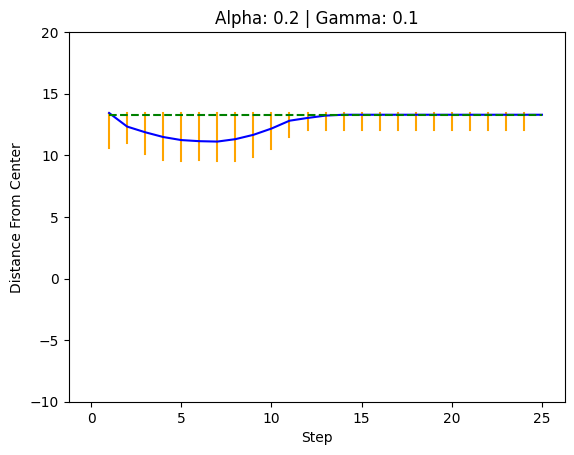

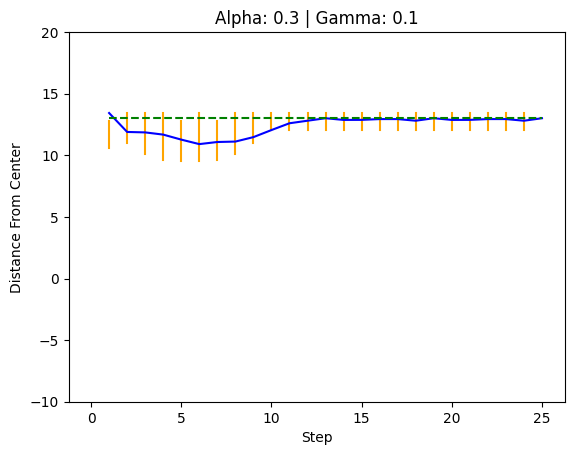

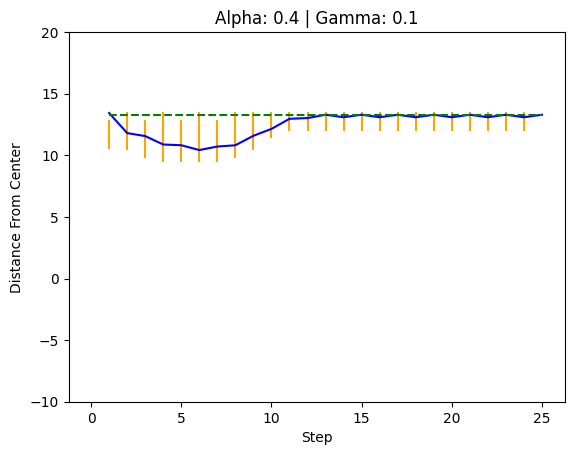

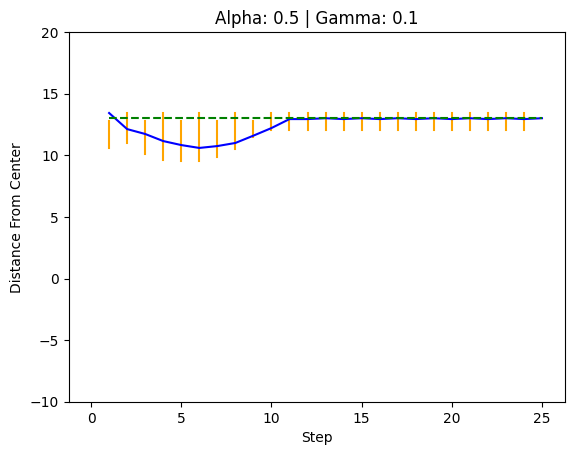

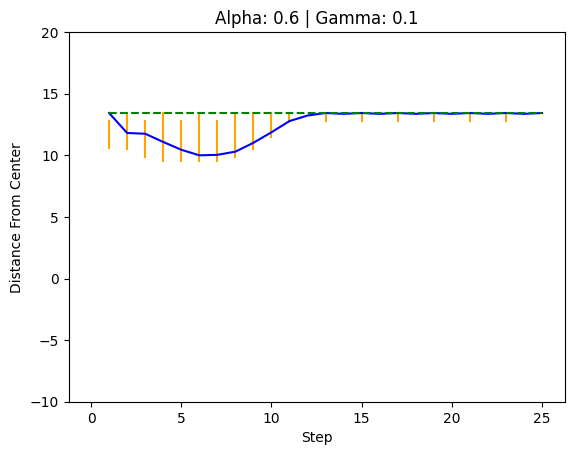

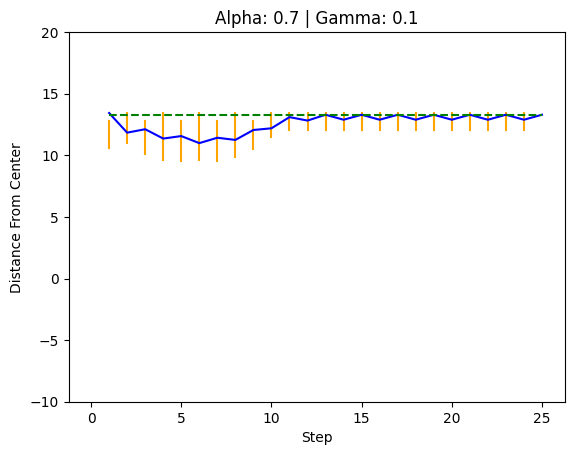

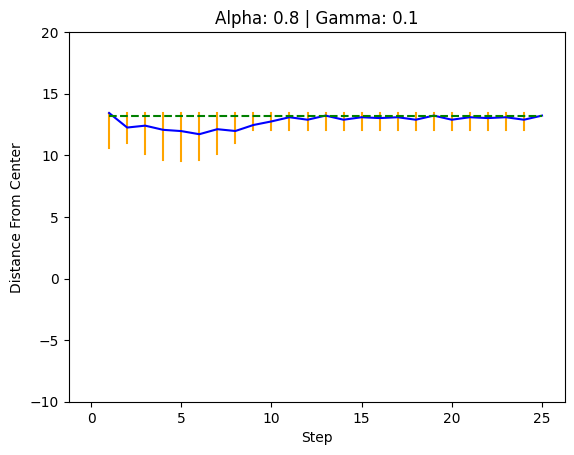

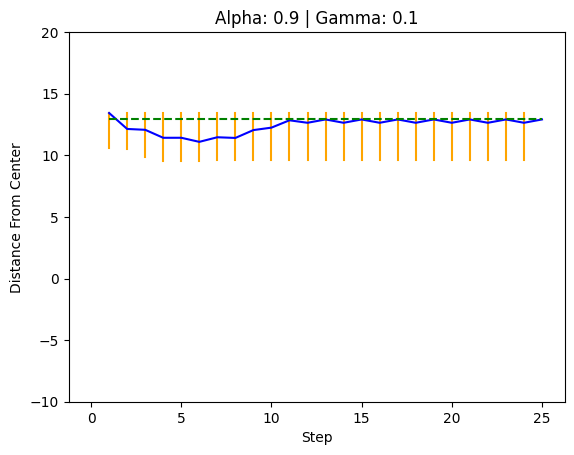

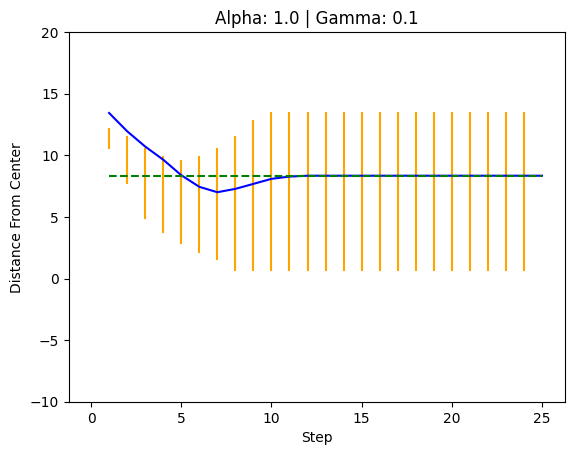

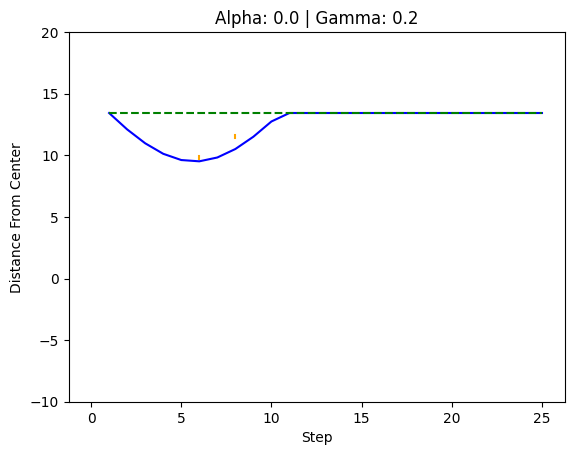

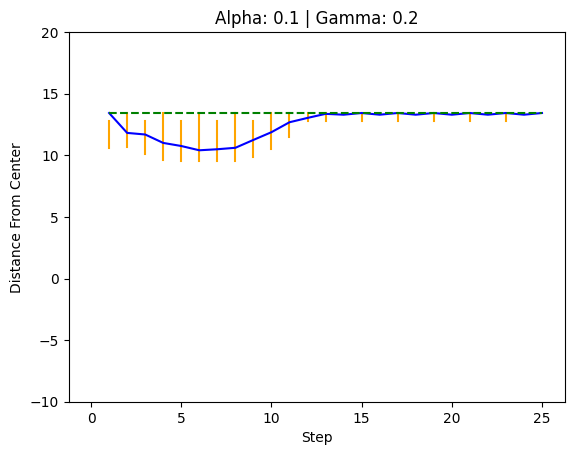

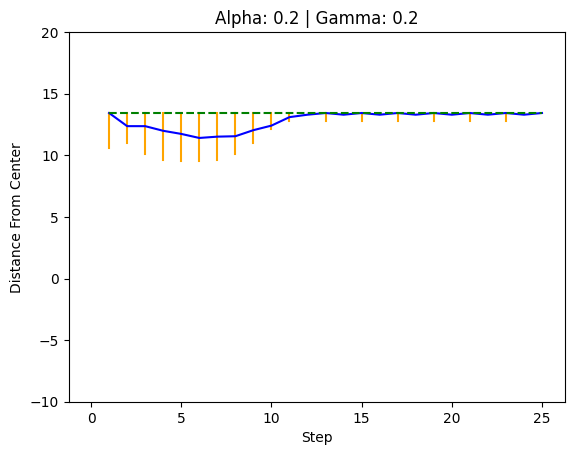

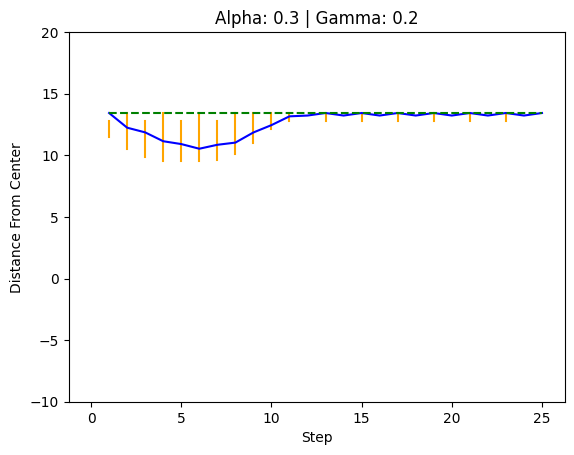

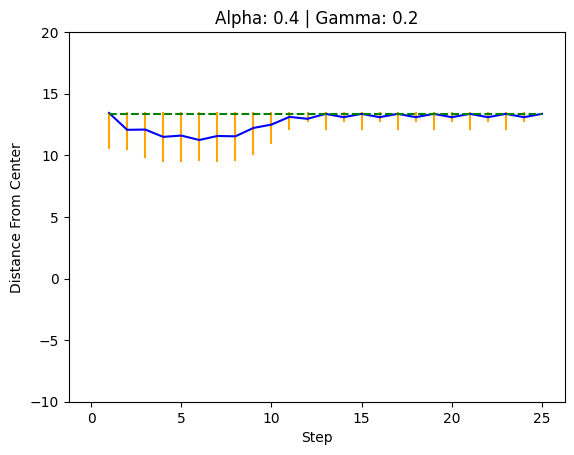

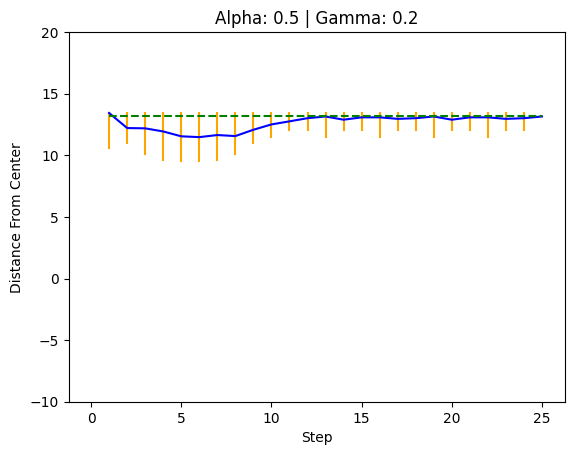

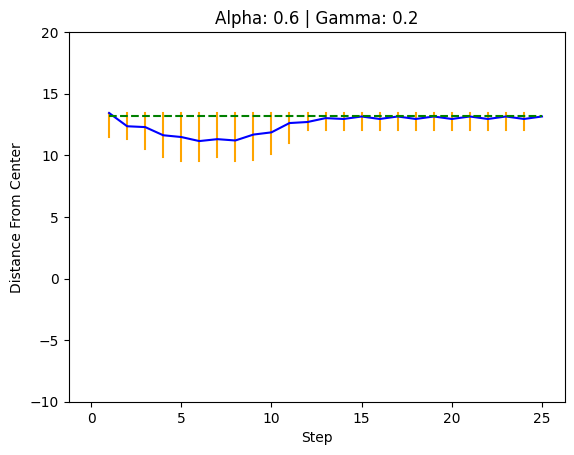

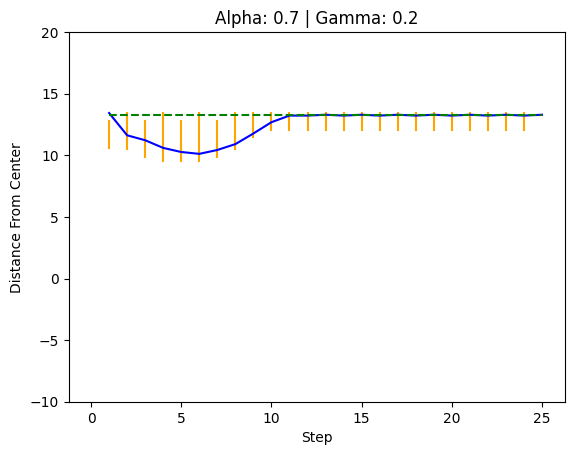

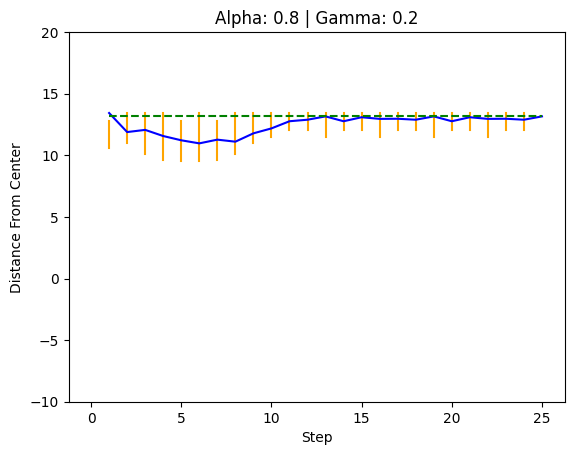

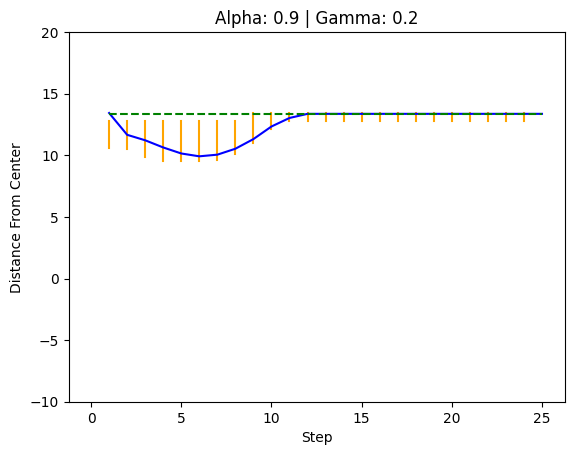

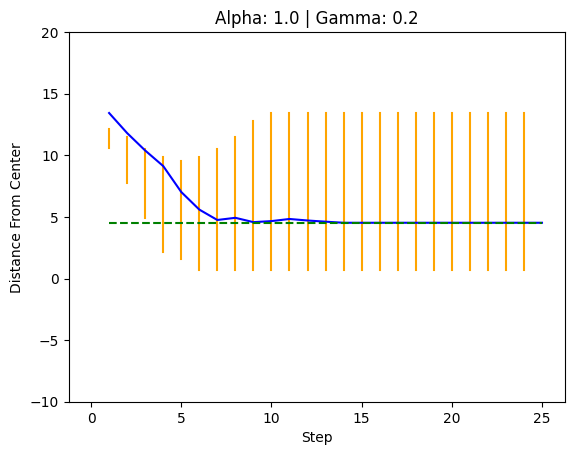

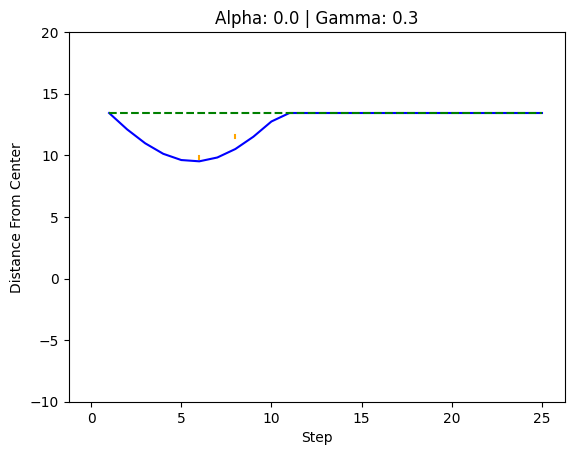

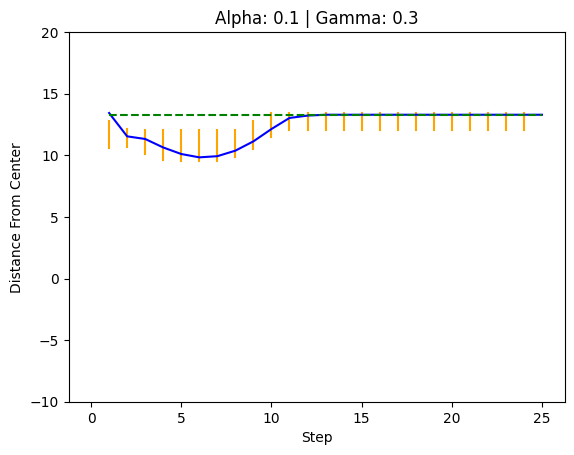

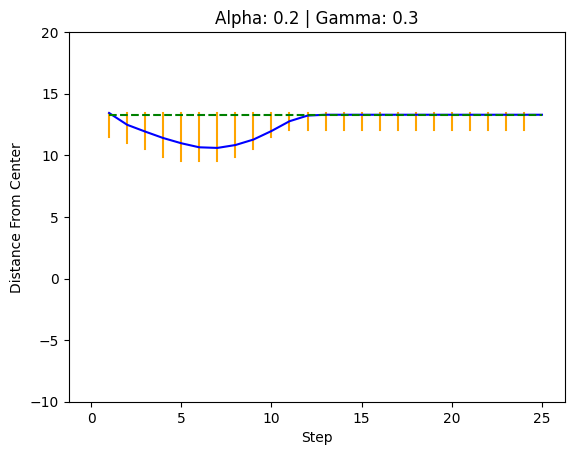

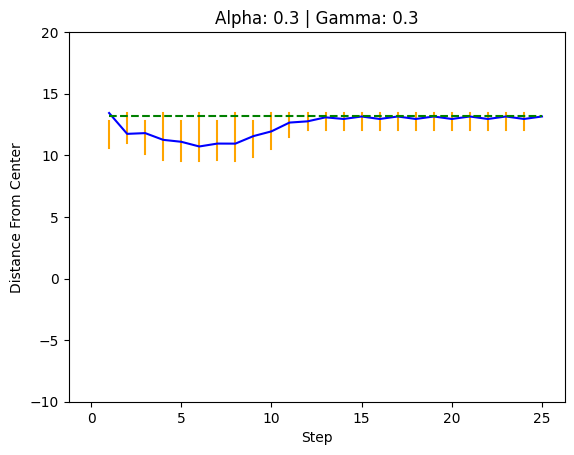

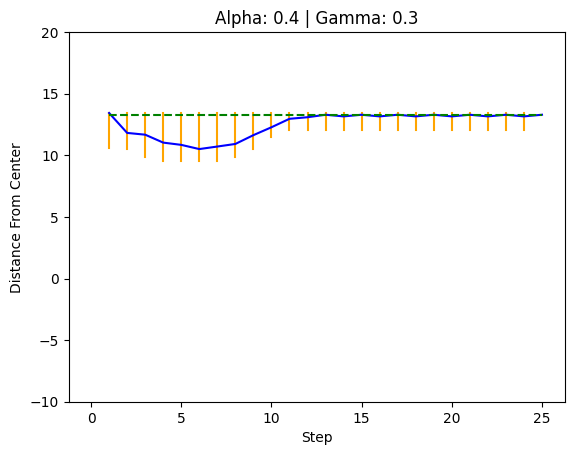

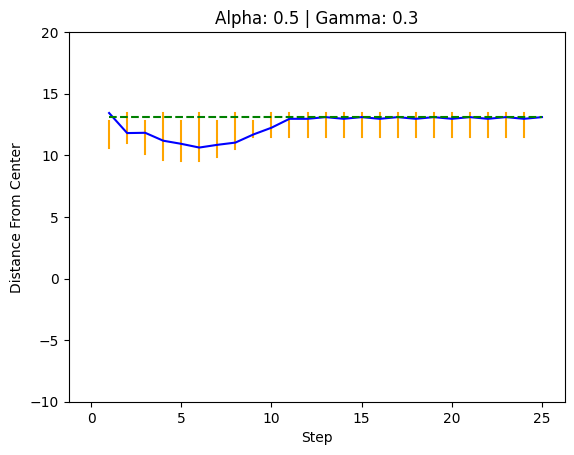

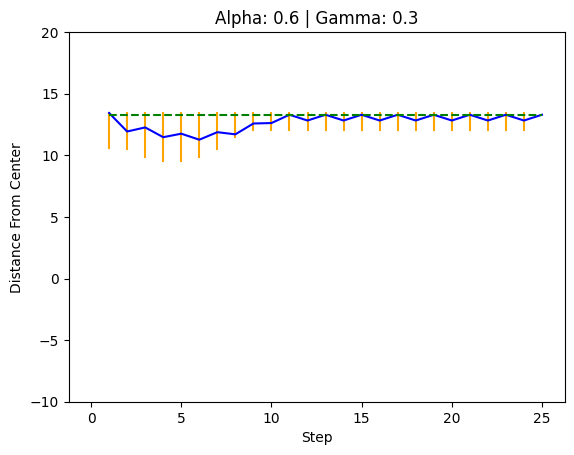

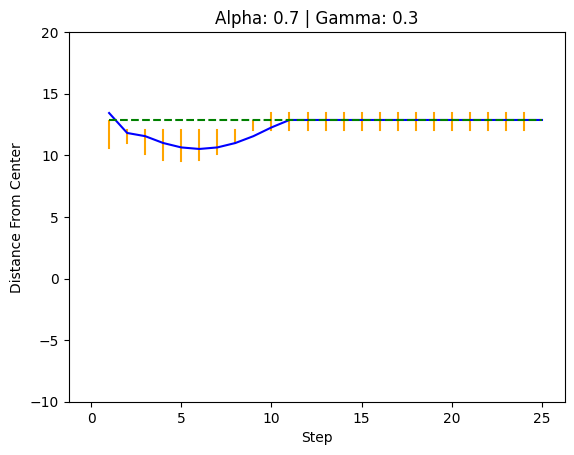

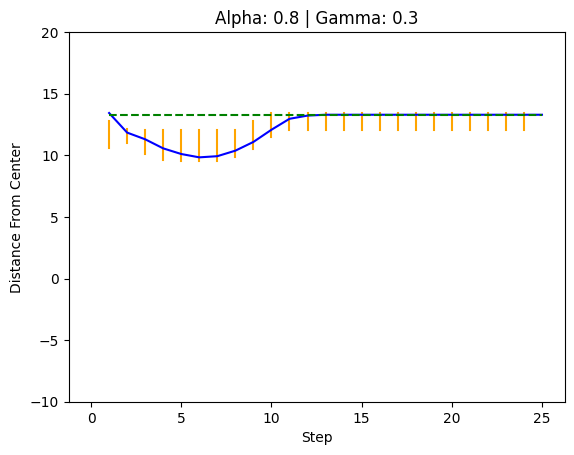

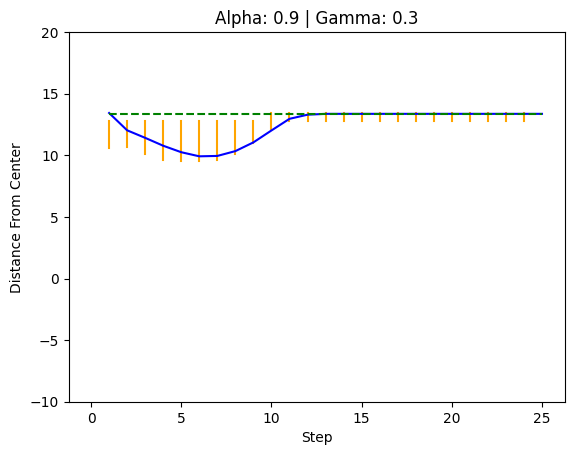

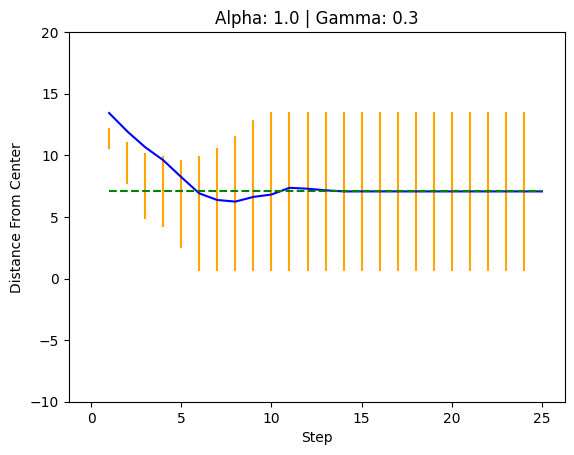

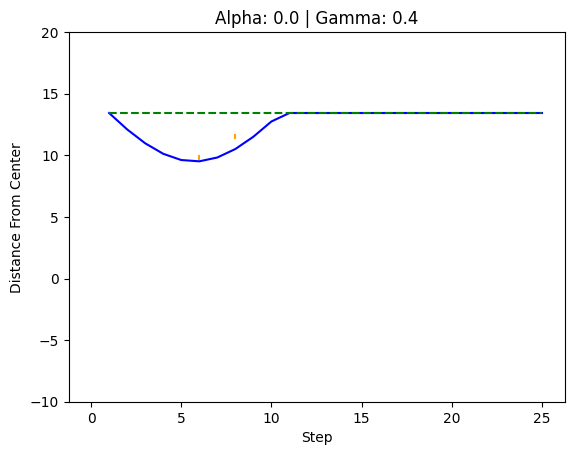

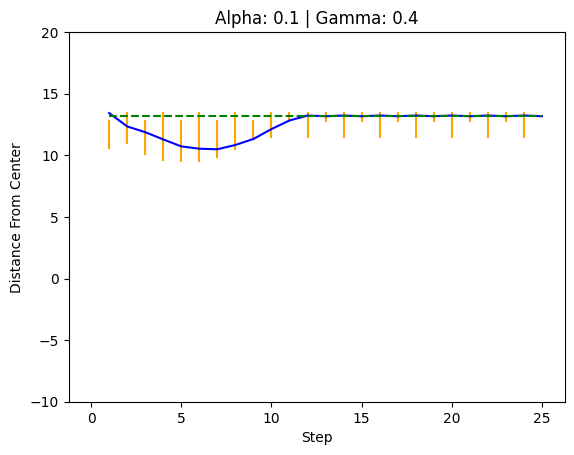

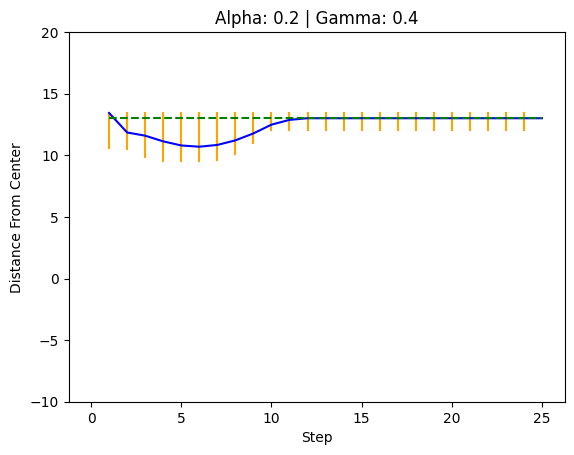

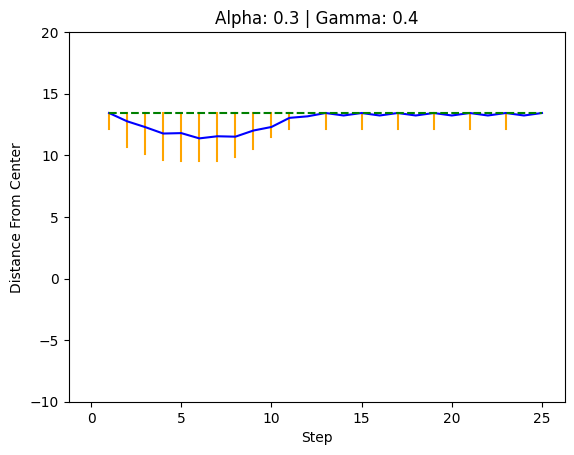

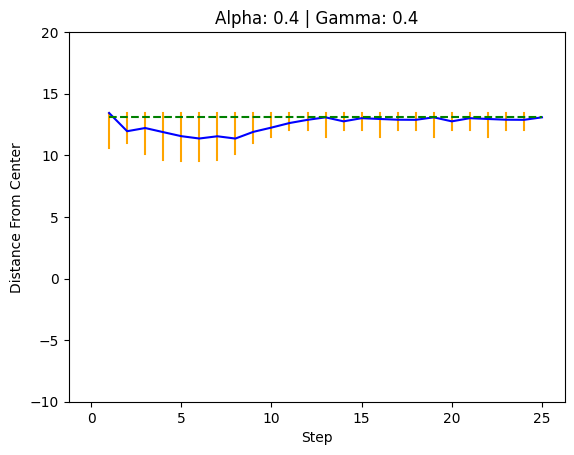

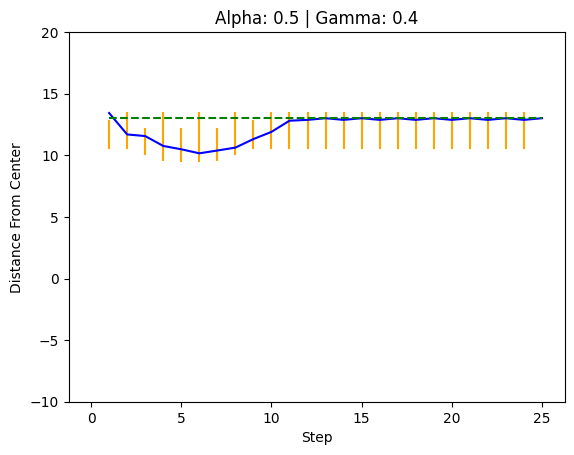

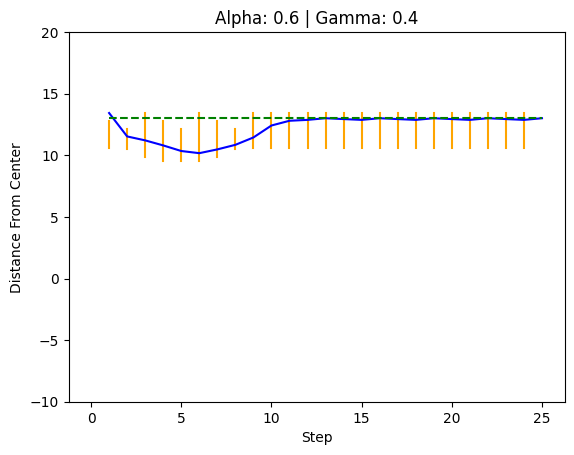

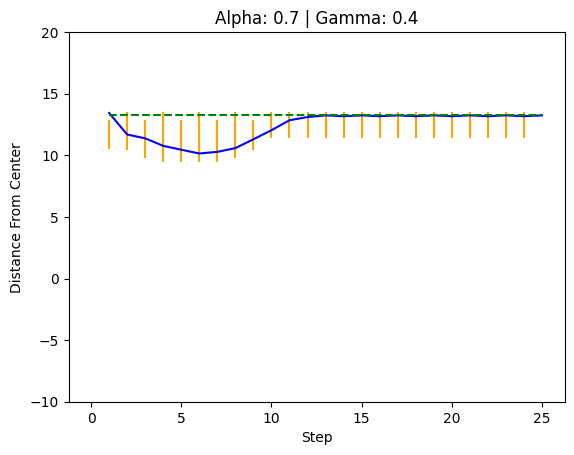

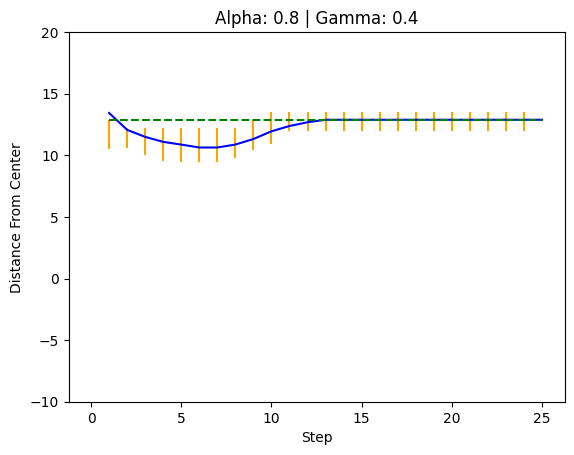

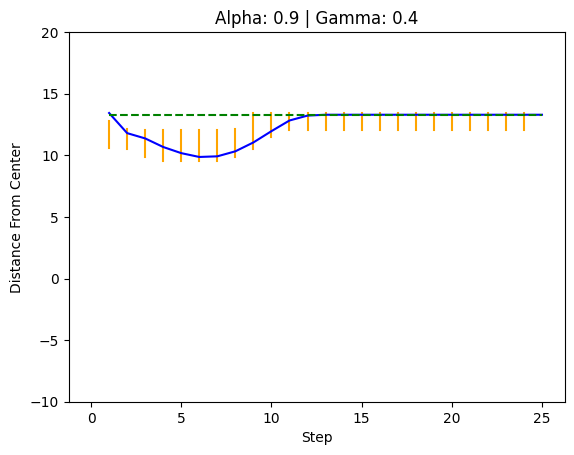

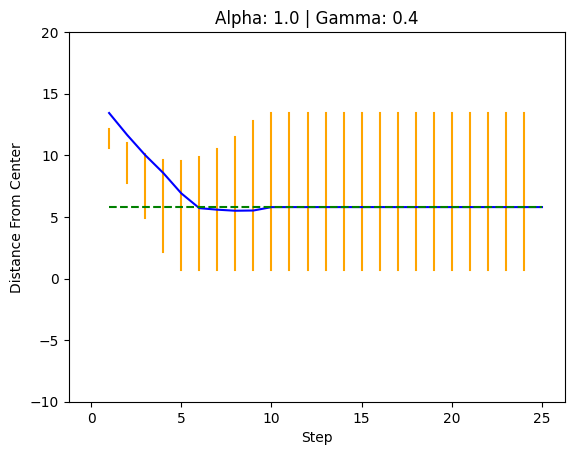

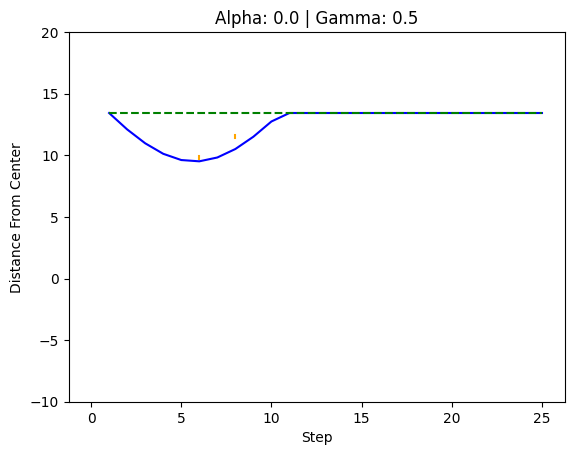

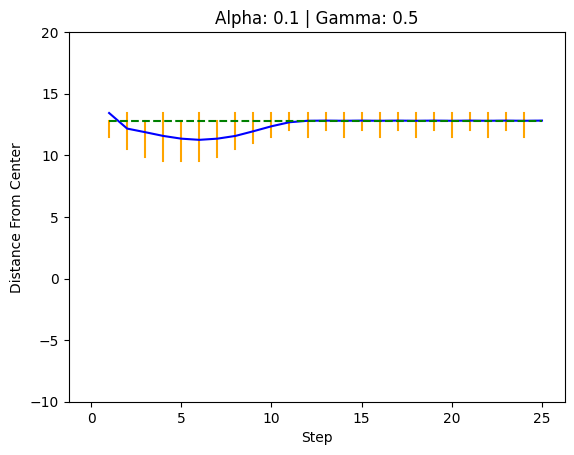

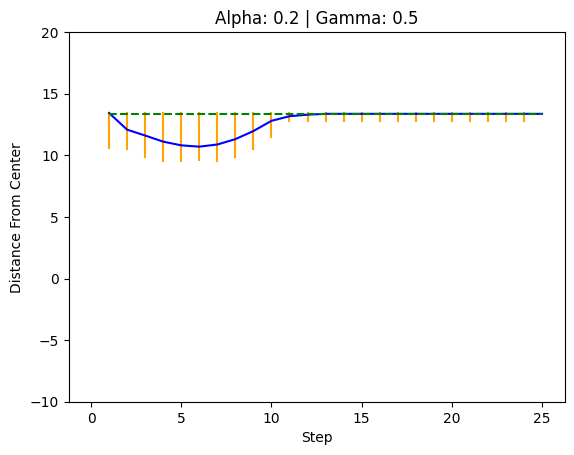

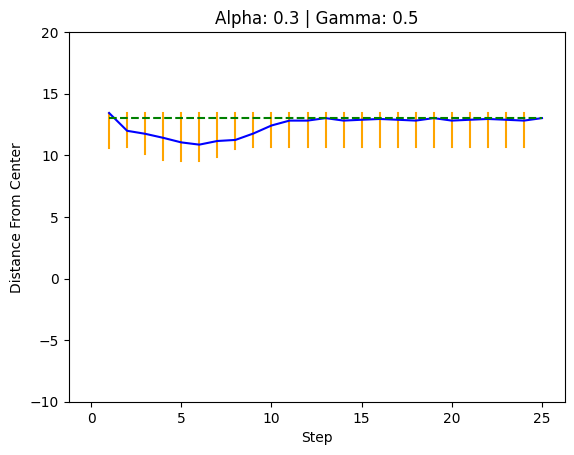

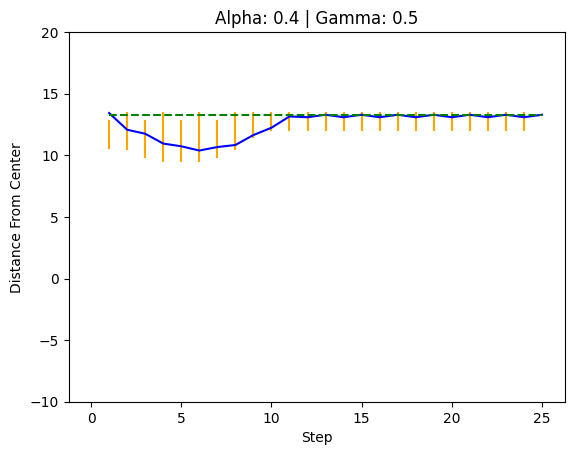

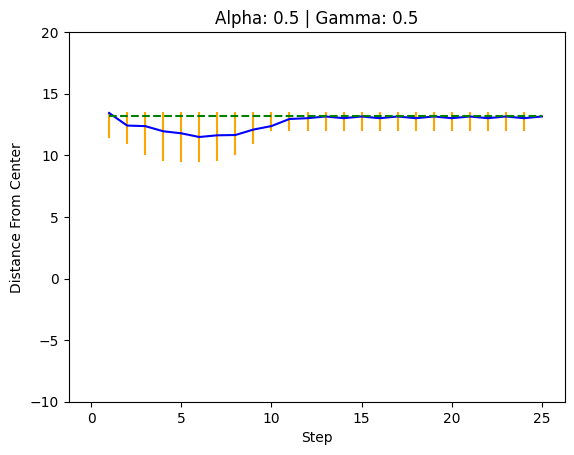

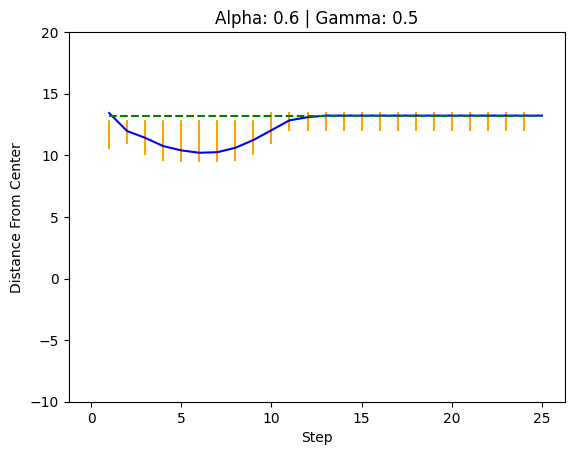

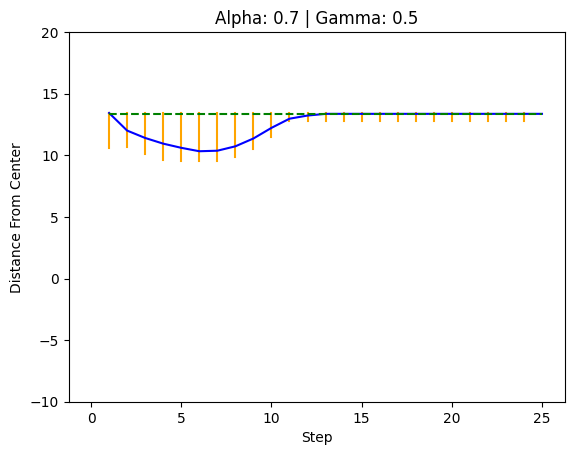

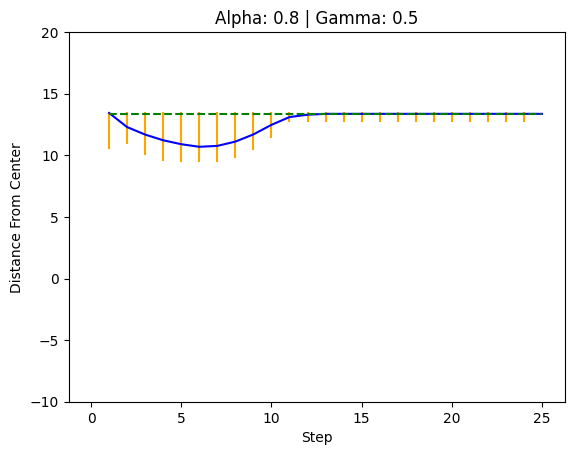

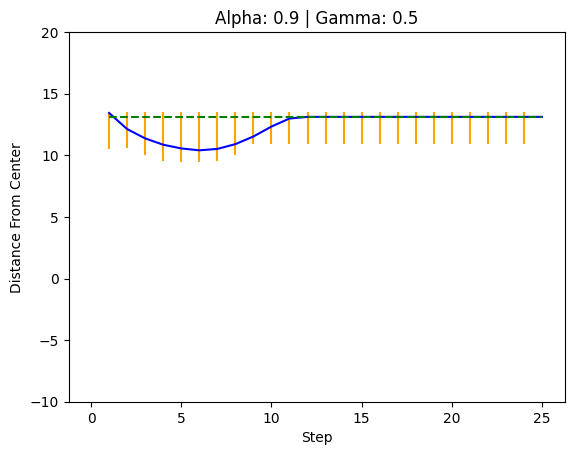

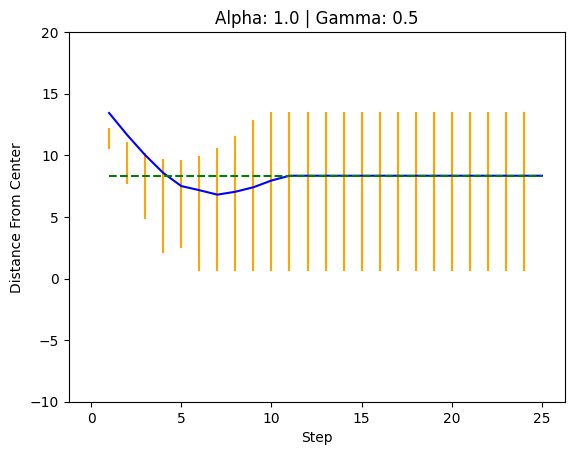

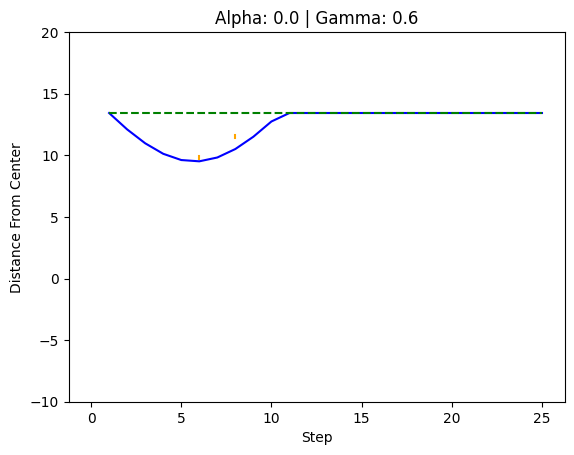

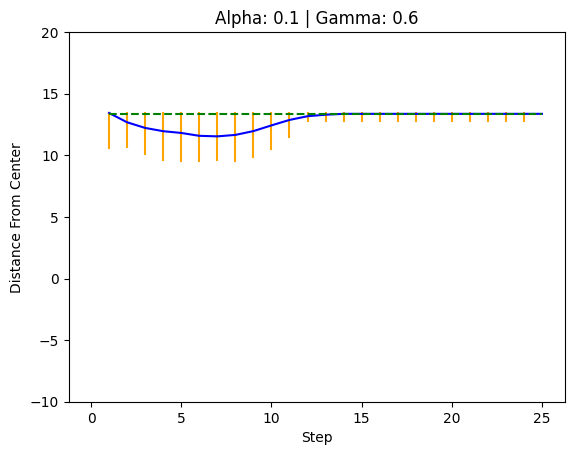

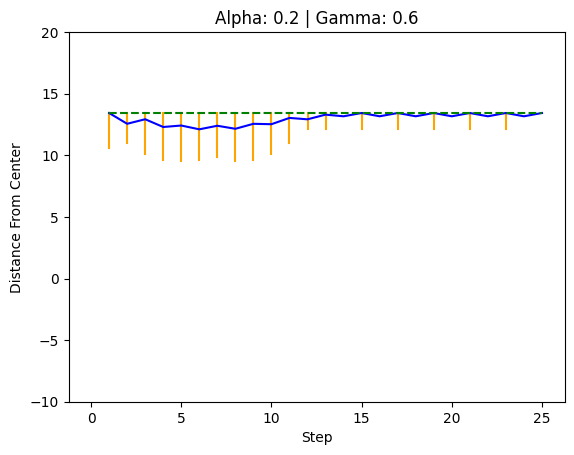

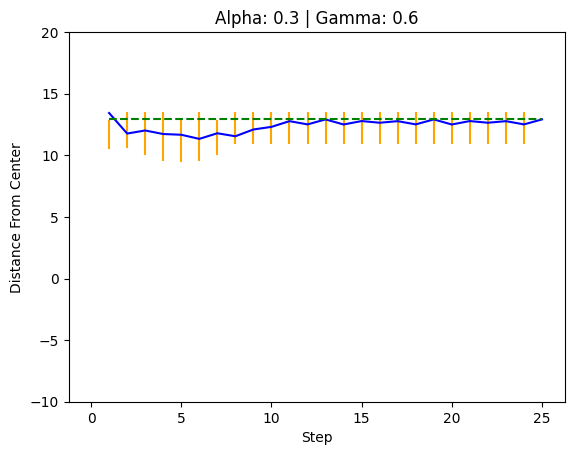

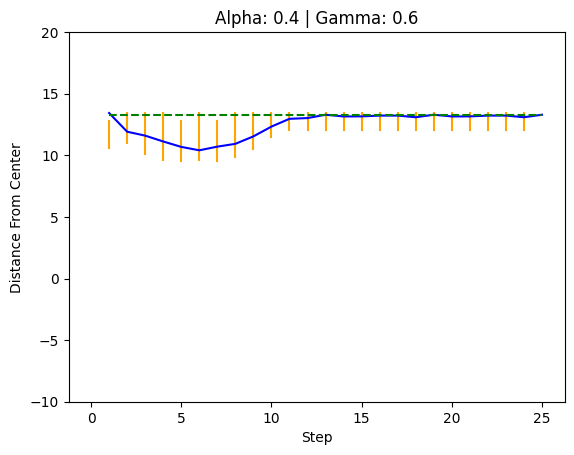

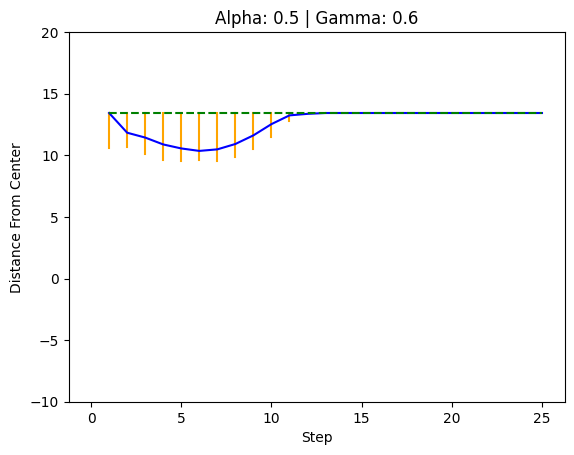

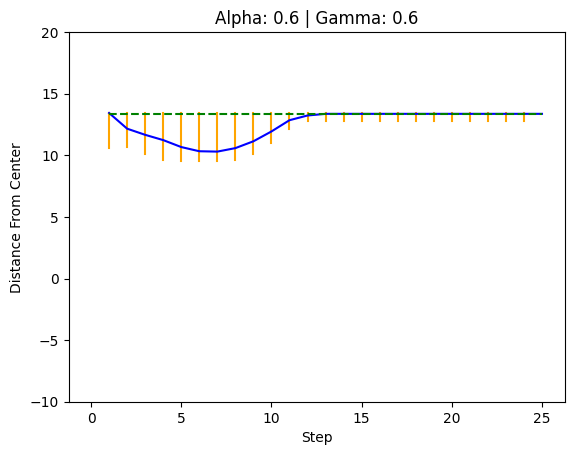

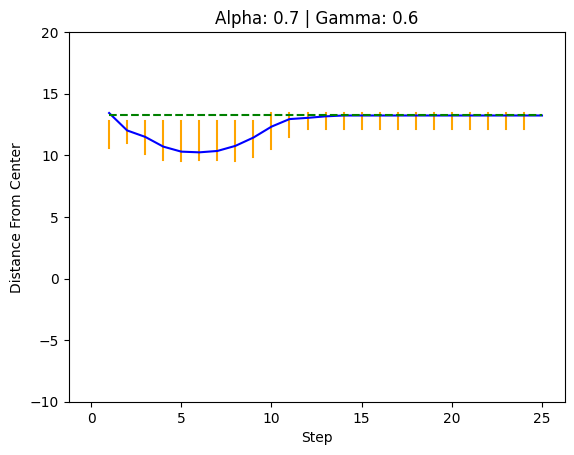

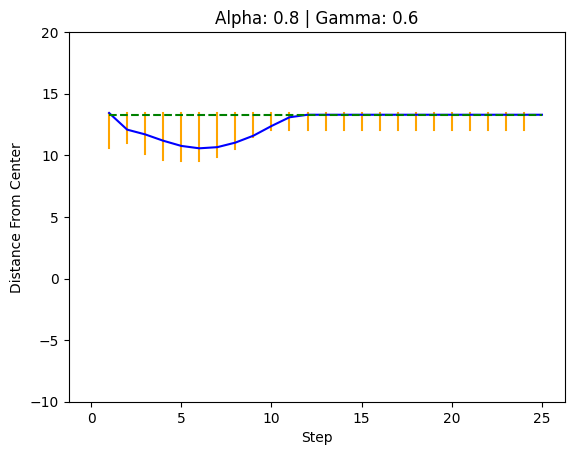

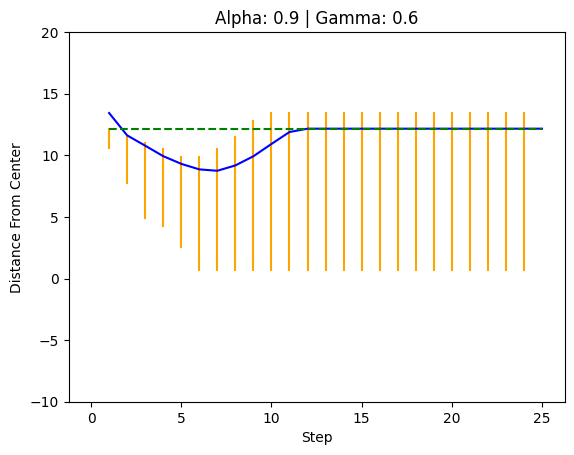

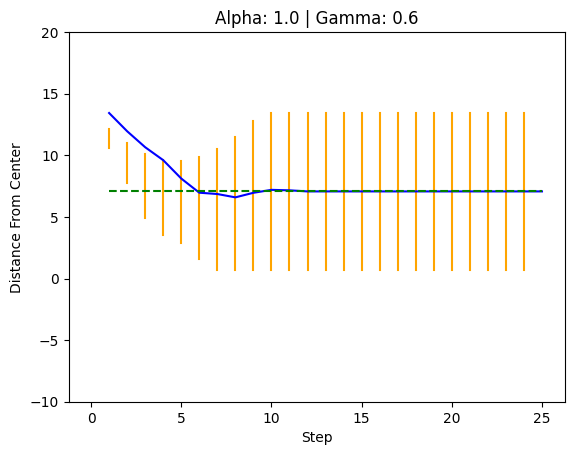

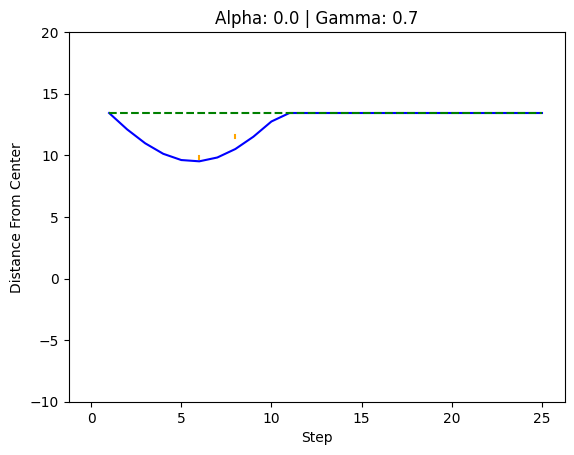

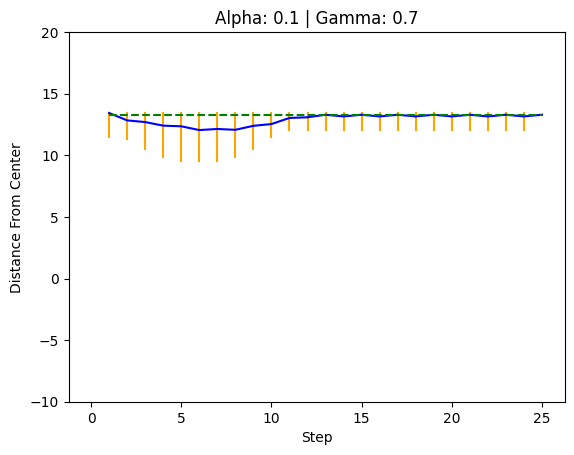

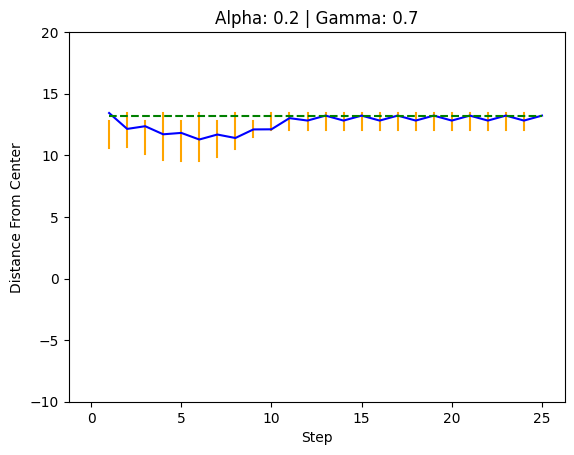

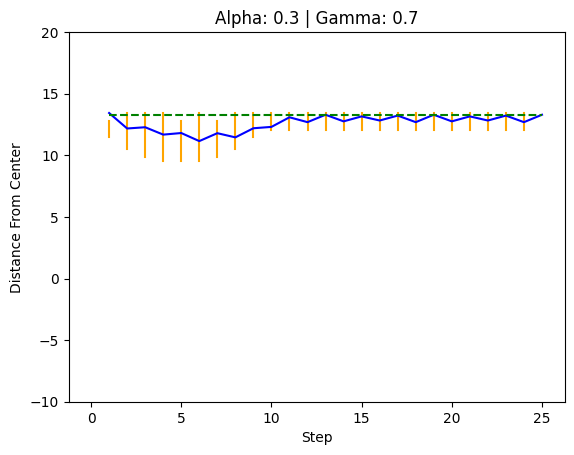

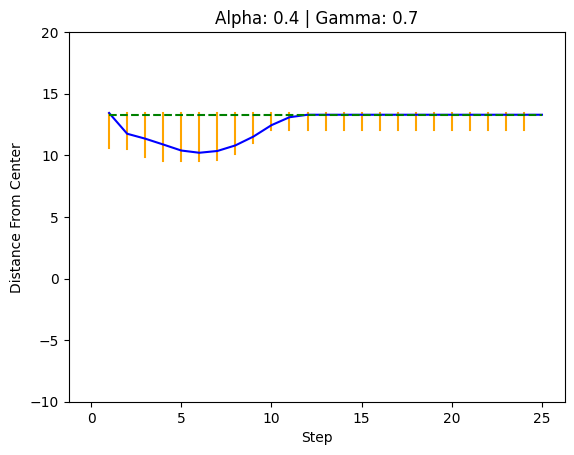

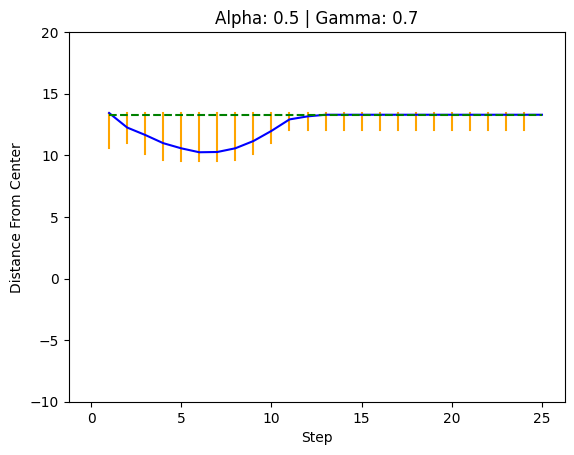

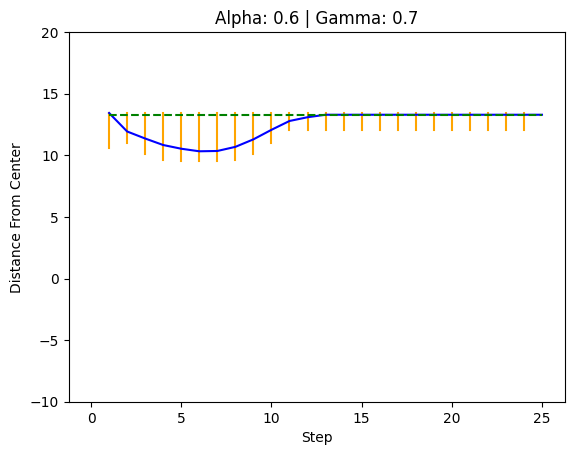

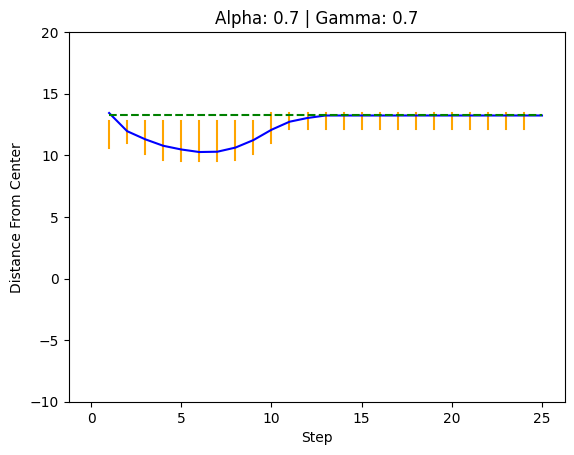

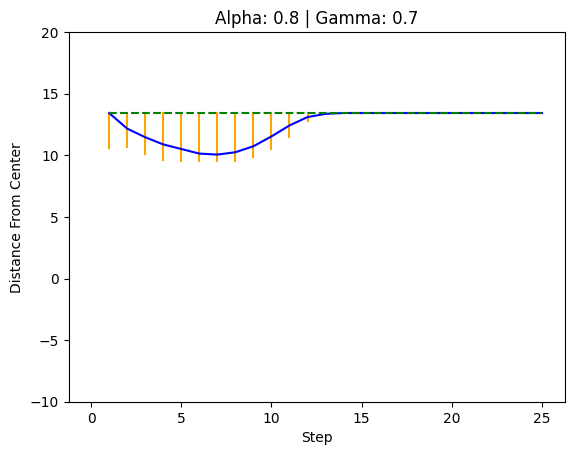

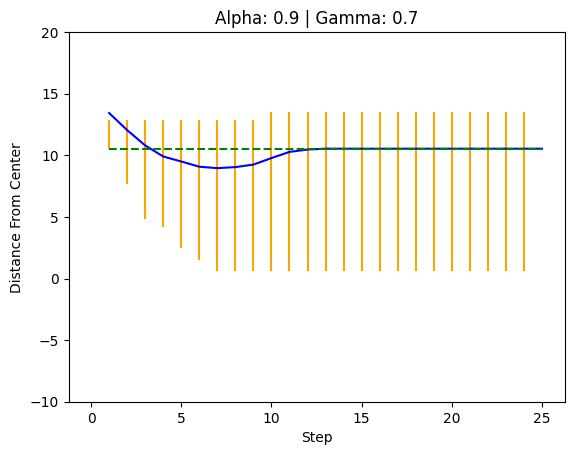

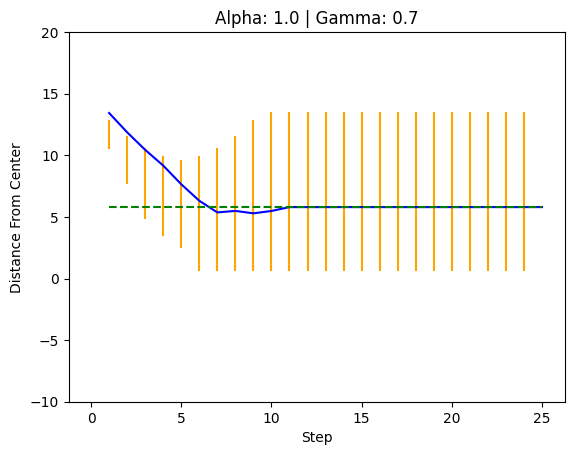

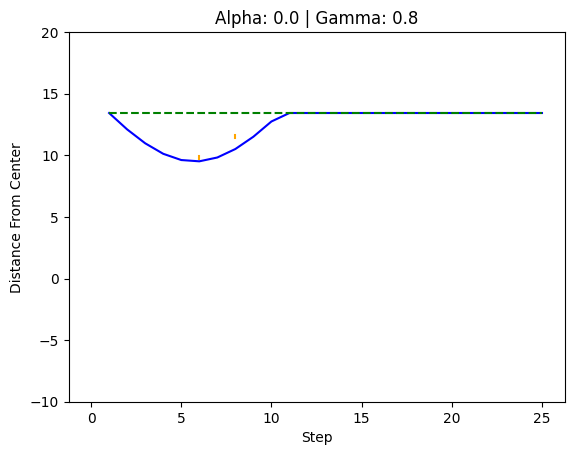

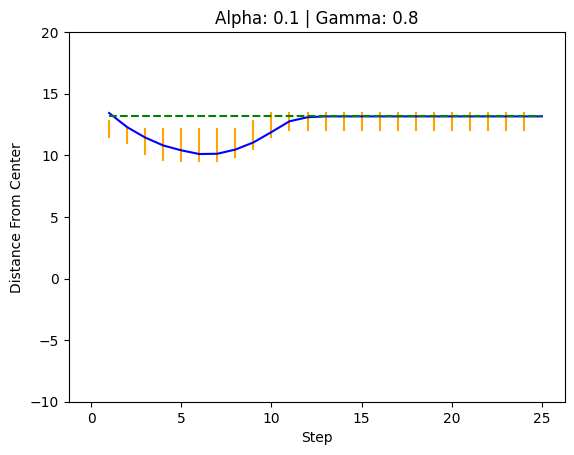

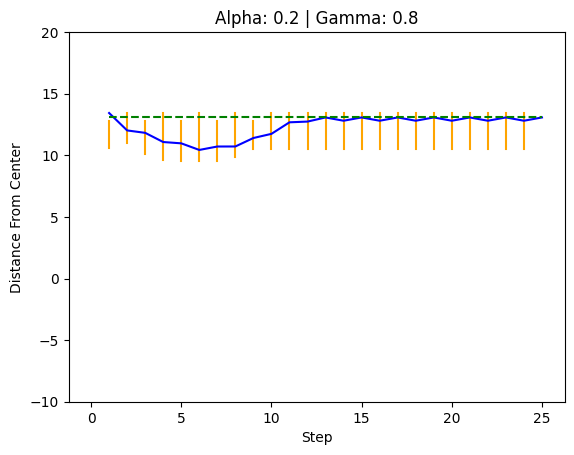

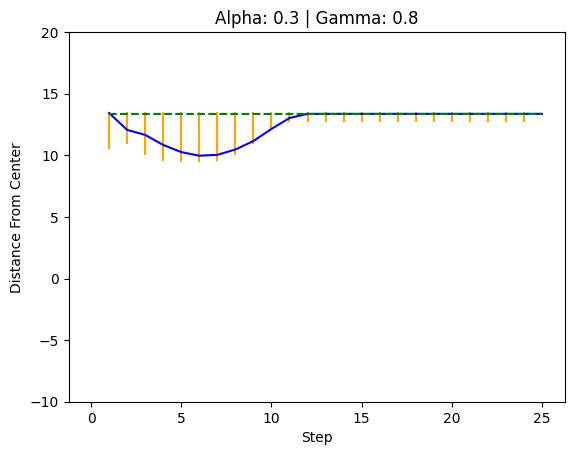

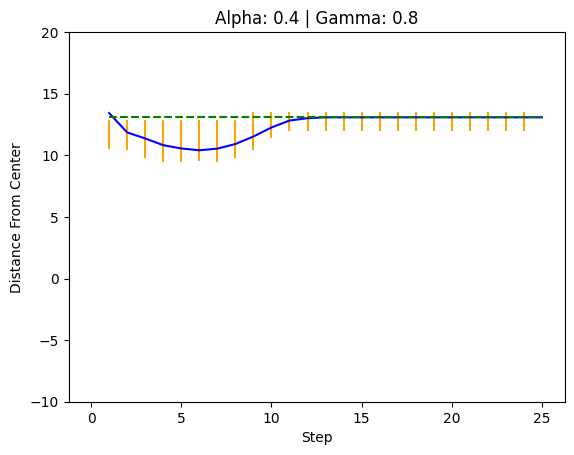

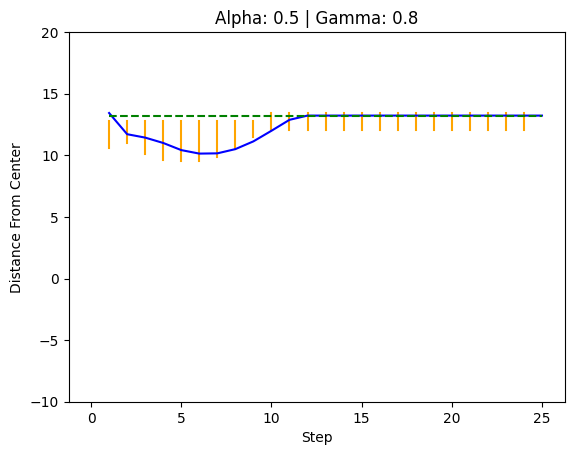

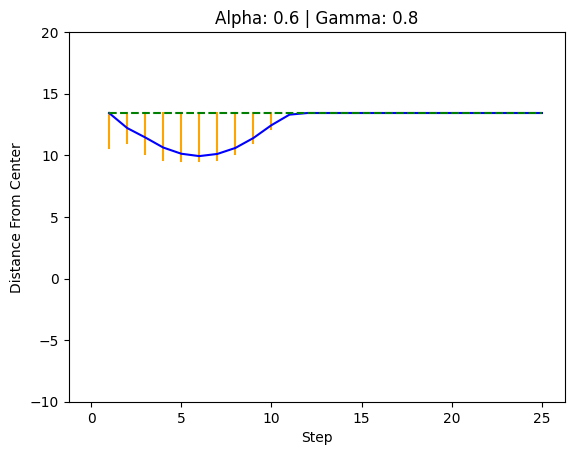

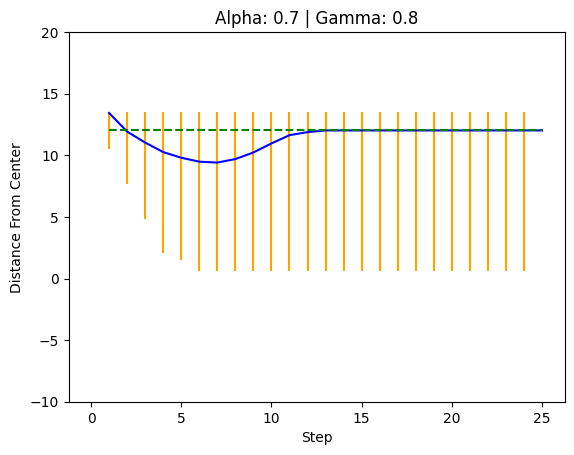

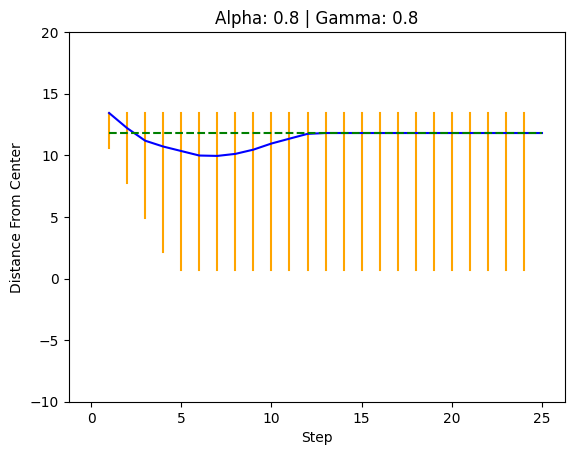

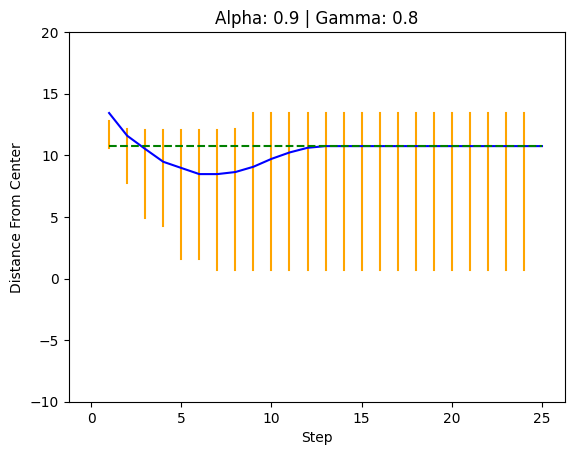

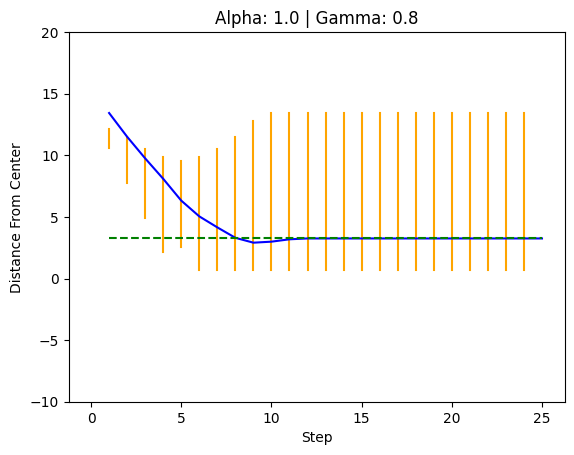

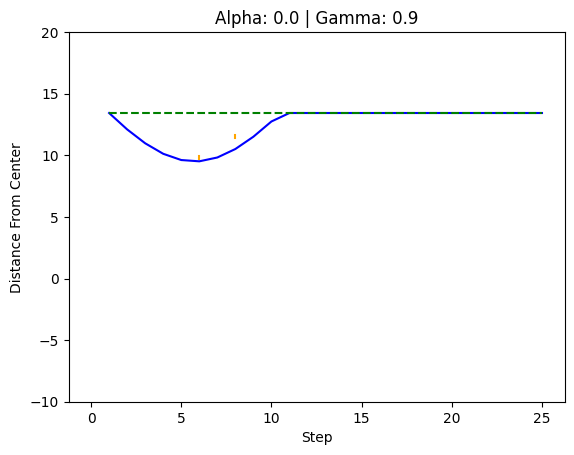

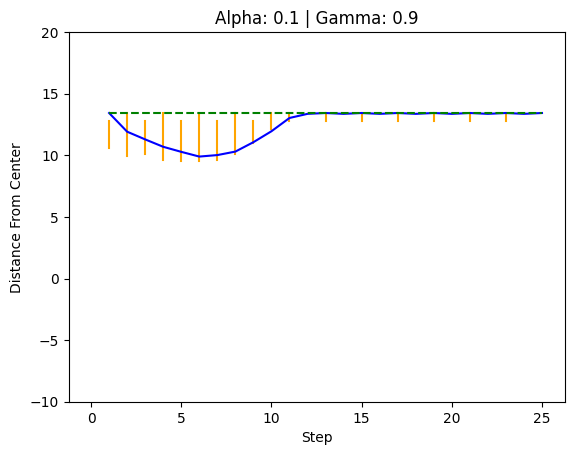

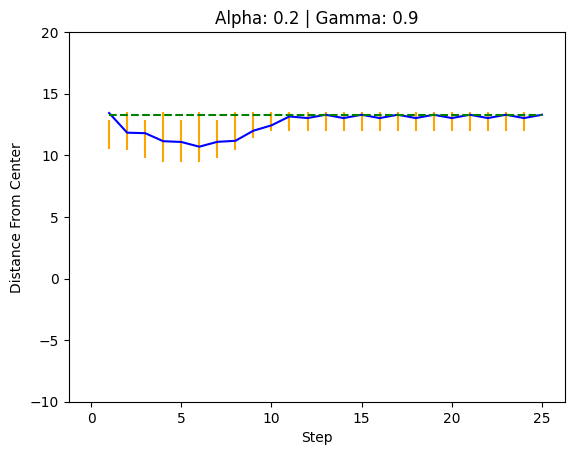

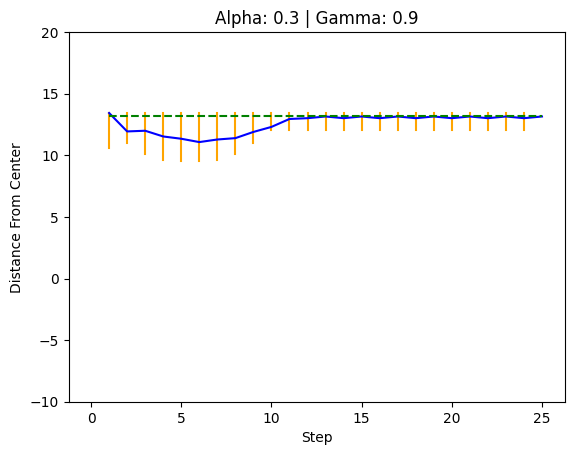

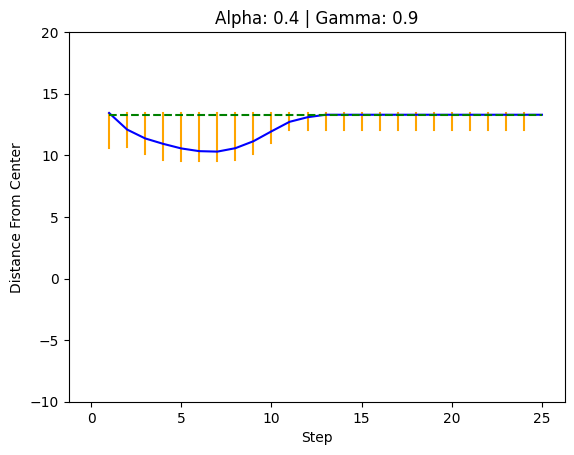

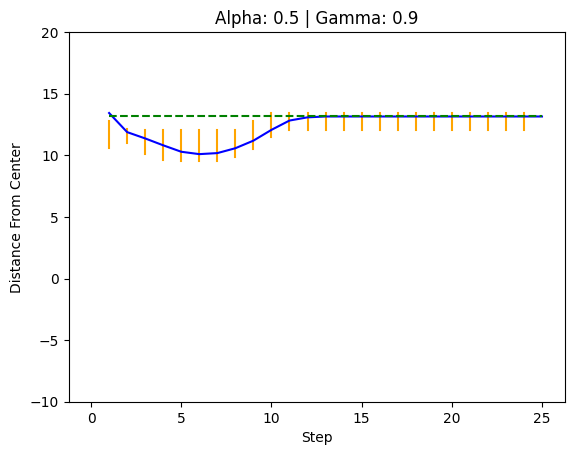

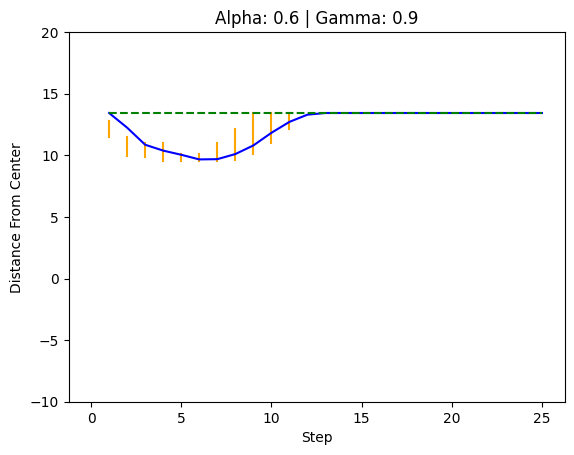

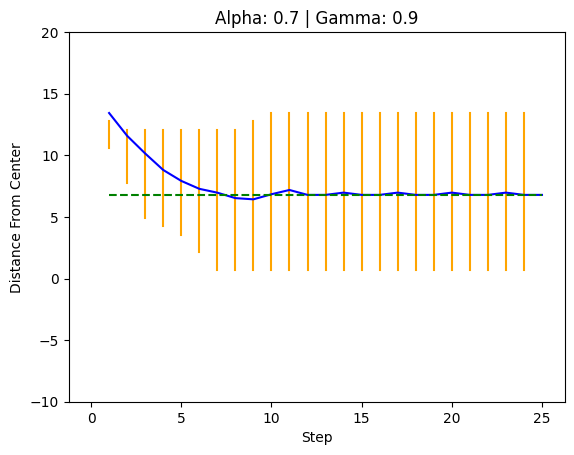

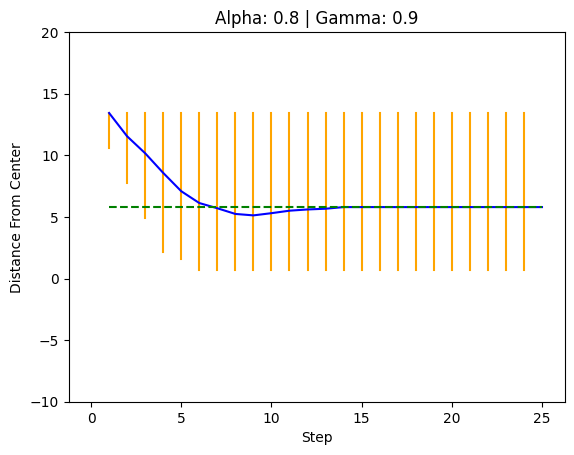

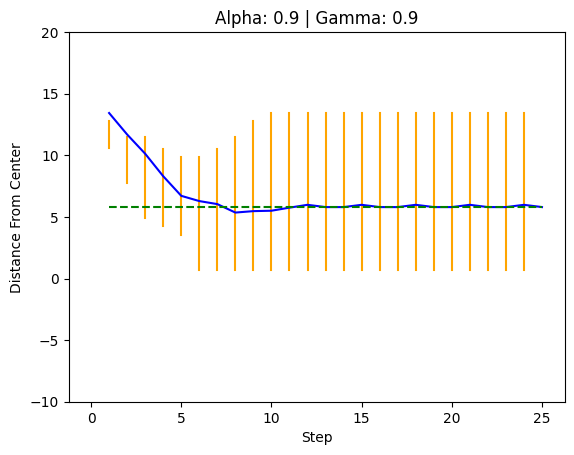

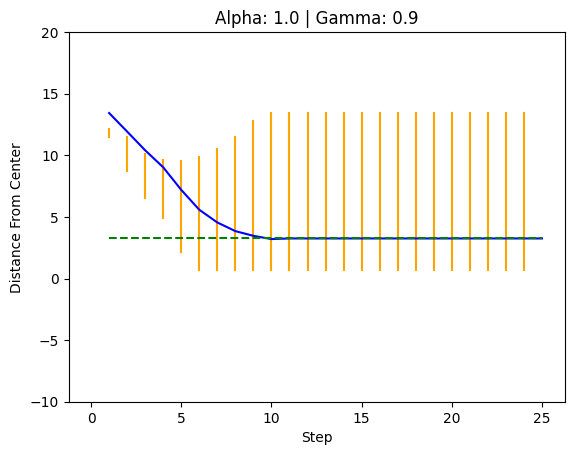

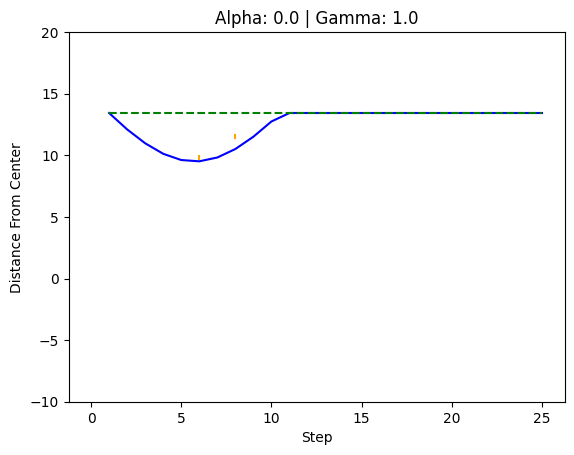

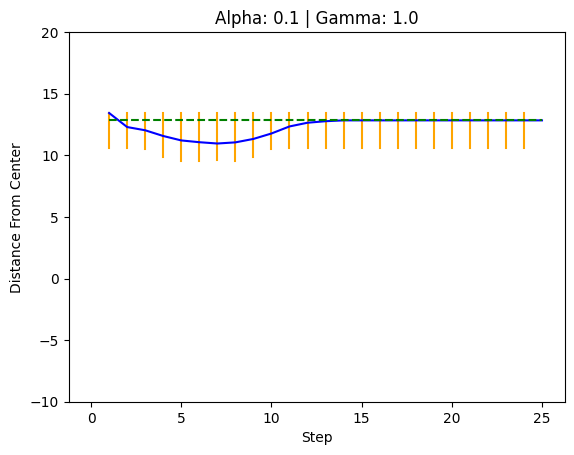

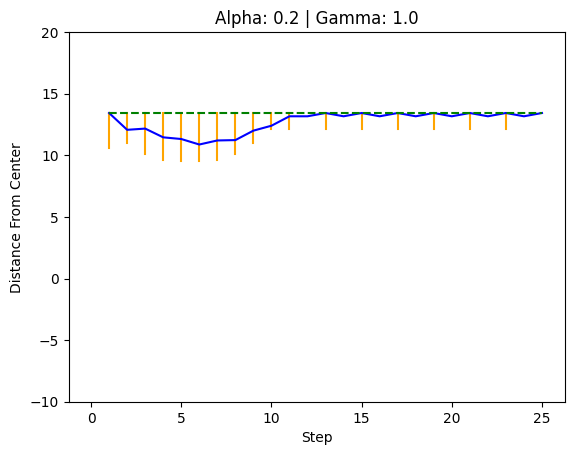

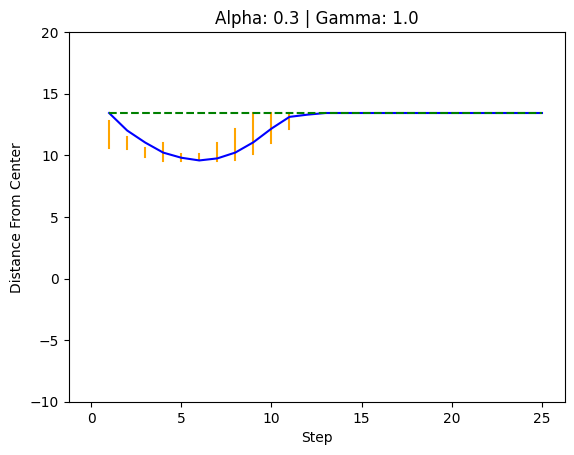

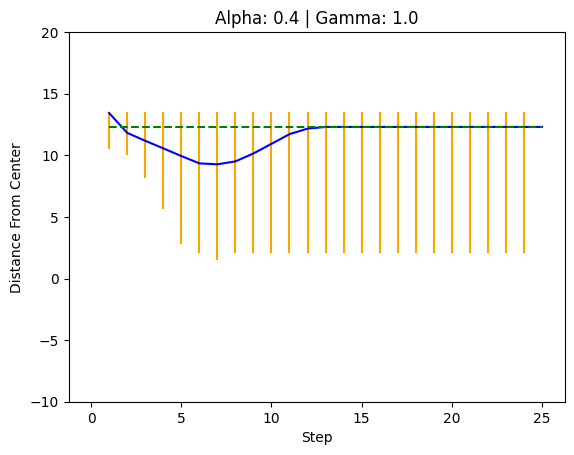

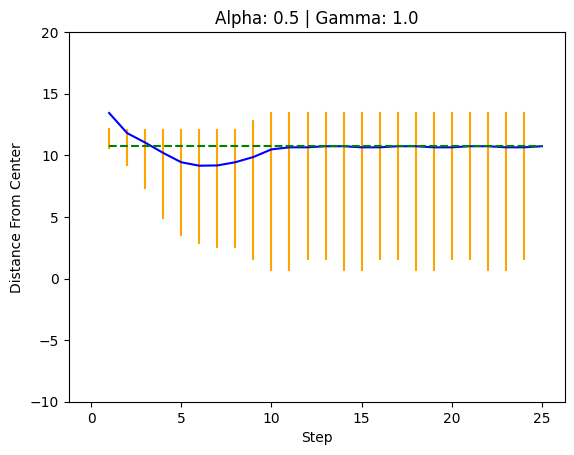

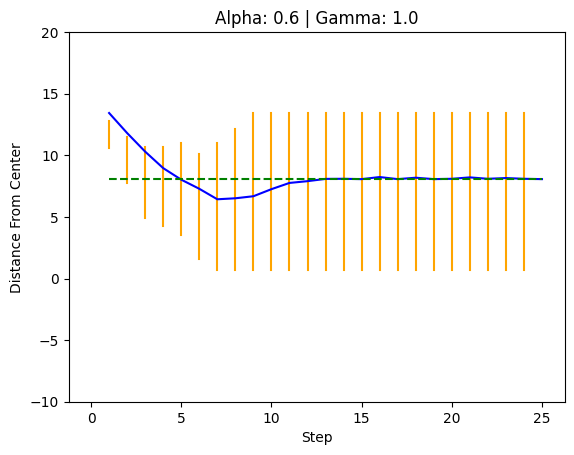

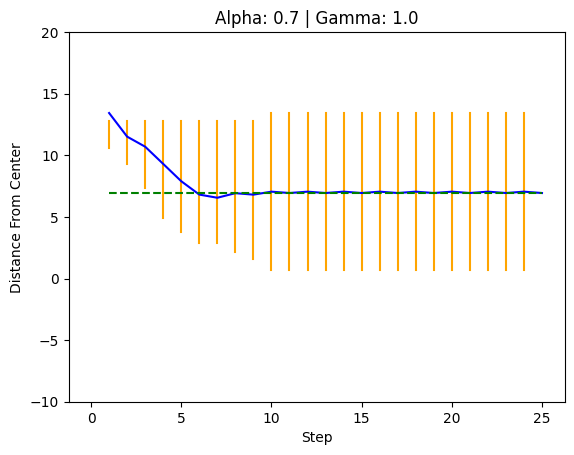

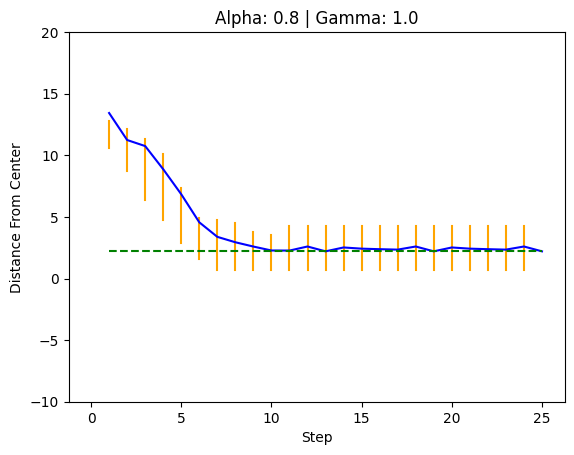

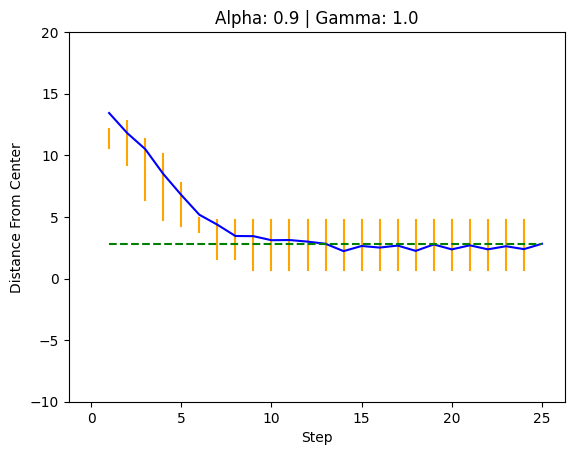

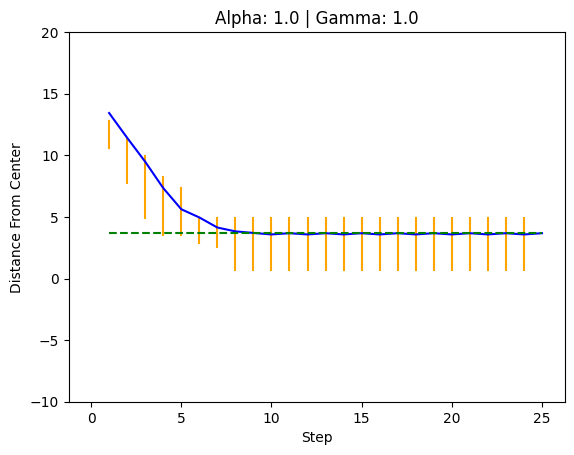

In [ ]:
#Simulate model distance from center (avg across 100 runs) for gamma and alpha values 0 through 1 incremented by 0.05
import math

#For later analysis
results = []
finalBar = []
averageBar = []

#Save num steps (25)
steps=[]
for i in range(1,26):
  steps.append(i)

#For error bars
errorBars = []
for i in range(1,26):
  errorBars.append([100,0])

#Find avg distance at each step
for gammaI in range(1,12):
  gamma = 0.1*(gammaI-1)
  for alphaI in range(1,12):
    dist=[]
    errorBars = []
    for i in range(1,26):
      errorBars.append([100,0])
    for i in range(1,26):
      dist.append(0)
    alpha = 0.1*(alphaI-1)
    for i in range (10):
      testAgent = agent(alpha, gamma, epsilon)
      trainingData = testAgent.trainQTable(100)
      xSet, ySet = testAgent.simulate(25)
      for step in range(len(xSet)):
        distanceCenter = math.sqrt((xSet[step]-9.5)**2+(ySet[step]-9.5)**2)
        dist[step] += distanceCenter/10
        if(distanceCenter<=errorBars[step][0]):
          errorBars[step][0]=distanceCenter
        if(distanceCenter>=errorBars[step][1]):
          errorBars[step][1]=distanceCenter
    results.append(dist[-1])
    finalBar.append(errorBars[-1][1]-errorBars[-1][0]+0.01)
    averageBarSize = 0
    for bar in range(len(errorBars)):
      averageBarSize+=(errorBars[bar][1]-errorBars[bar][0])/25
    averageBar.append(averageBarSize+0.01)



    plt.xlabel("Step")
    plt.ylabel("Distance From Center")
    plt.title("Alpha: " + str(float(int(alpha*10))/10) + " | Gamma: " + str(float(int(gamma*10))/10))
    plt.ylim(-10, 20)
    for i in range(0, len(errorBars)):
      if(errorBars[i][0]==dist[i] and errorBars[i][1]==dist[i]):
        plt.plot([i,i], [dist[i]-0.1, dist[i]+0.1], color='orange')
      else:
        plt.plot([i,i], errorBars[i], color='orange')
    plt.plot(steps, dist, color = 'blue')
    plt.plot([1,25], [dist[-1],dist[-1]], color = 'green', linestyle = 'dashed')
    plt.show()

2.649671092253627


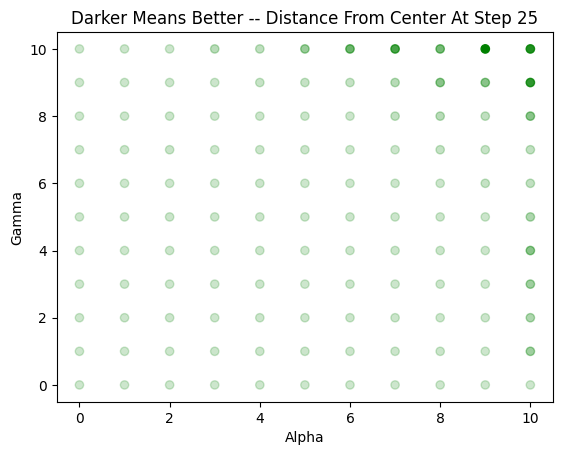

0.0


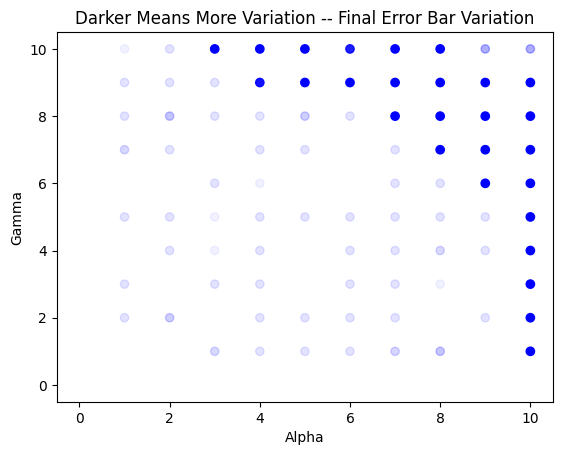

[0.0, 0.0, 0.09457134133088914, 0.07906455512464809, 0.0, 0.11591595065773966, 0.09457134133088914, 0.06260460941596185, 0.11591595065773966, 0.14166916454060993, 0.1220479447603573, 0.0, 0.5550238080487555, 1.5091203699872804, 1.8876016039725385, 2.077116237819383, 1.9671194284493922, 1.6151881221640956, 2.340060014290629, 2.9167335154727305, 0.43910785739101593, 10.224025030904915, 0.0, 2.1425956400848167, 2.6446918696989288, 1.6769783388617092, 2.108585548518731, 1.986174210843076, 2.1161283188668123, 1.9972076122993383, 1.5837728479281645, 2.097514271697382, 10.319328410468328, 0.0, 2.097514271697382, 1.6142551921569268, 2.045391737209434, 2.032715756348115, 1.5489455907955547, 1.9419823212887295, 1.85971160058685, 1.6808367992298632, 1.3288721496863276, 10.354289692424233, 0.0, 1.2968833704940208, 2.2403005088433736, 1.6320020922832499, 2.2387205700582427, 1.4673509791798682, 2.2653178543365096, 1.8500214506149029, 2.3380053776019305, 1.6056981816282159, 10.249004225339347, 0.0, 1

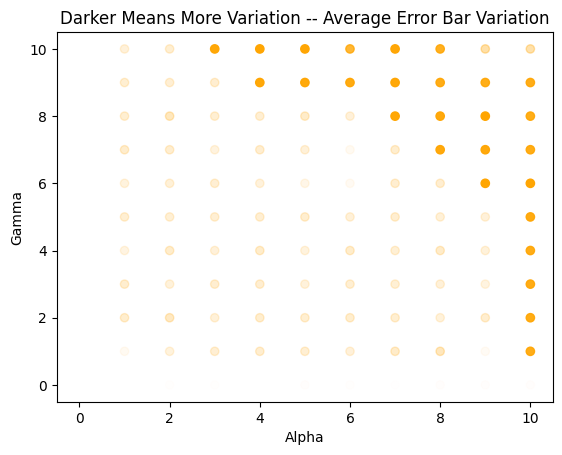

In [ ]:
#Visualize the results of the above numbers, taking the max and min and calculating deviation from those in order the evakuate performance, so essentially
gammaY = []
alphaX = []
resultAlpha = []
print(min(results))
for gamma in range(11):
  for alpha in range(11):
    alphaX.append(alpha)
    gammaY.append(gamma)
    resultAlpha.append((min(results)/(results[gamma*11+alpha] + 1e-9))**1) # Added epsilon
plt.scatter(alphaX, gammaY, alpha = resultAlpha, color = 'green')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
plt.title("Darker Means Better -- Distance From Center At Step 25")
plt.show()

#Visualize the results of the above numbers, taking the max and min and calculating deviation from those in order the evakuate performance, so essentially
gammaY = []
alphaX = []
resultAlpha = []
print(min(finalBar))
for gamma in range(11):
  for alpha in range(11):
    alphaX.append(alpha)
    gammaY.append(gamma)
    resultAlpha.append(((finalBar[gamma*11+alpha])/max(finalBar))**1) # Added epsilon
plt.scatter(alphaX, gammaY, alpha = resultAlpha, color = 'blue')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
plt.title("Darker Means More Variation -- Final Error Bar Variation")
plt.show()

#Visualize the results of the above numbers, taking the max and min and calculating deviation from those in order the evakuate performance, so essentially
print(averageBar)
gammaY = []
alphaX = []
resultAlpha = []
print(min(averageBar))
for gamma in range(11):
  for alpha in range(11):
    alphaX.append(alpha)
    gammaY.append(gamma)
    resultAlpha.append((averageBar[gamma*11+alpha])/max(averageBar)**1) # Added epsilon
plt.scatter(alphaX, gammaY, alpha = resultAlpha, color = 'orange')
plt.xlabel("Alpha")
plt.ylabel("Gamma")
plt.title("Darker Means More Variation -- Average Error Bar Variation")
plt.show()

25
Darker colors mean less steps to center (more ideal)


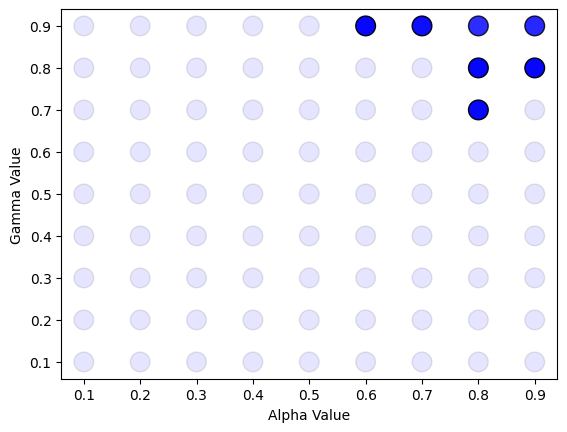

In [ ]:
#Calculate the average number of steps across 1000 episodes that the agent takes to get within 3 of the center of the gradient:
numStepsAvg = 0
numSteps = 0
alphaX = []
gammaY = []
keySteps = []
for alphaL in range(1,10):
  alpha = alphaL*0.1
  for gammaL in range(1,10):
    gamma = gammaL*0.1
    alphaX.append(alpha)
    gammaY.append(gamma)
    numStepsAvg = 0
    for episodes in range(10):
      testAgent = agent(alpha, gamma, epsilon)
      rewardInfo = testAgent.trainQTable(100)
      x,y = testAgent.simulate(25)
      numSteps = 0
      for step in range (len(x)):
        numSteps +=1
        distance = math.sqrt((x[step]-9.5)**2+(y[step]-9.5)**2)
        if(distance<=3):
          numStepsAvg += numSteps/10
          break
    if(numStepsAvg == 0):
      numStepsAvg = 25
    keySteps.append(numStepsAvg)

maxSteps = max(keySteps)
print(maxSteps)
for i in range(len(keySteps)):
  keySteps[i]/=maxSteps
  keySteps[i] = 1-keySteps[i]
  if(keySteps[i]<0.1):
    keySteps[i] = 0.1

#Visualize:
print("Darker colors mean less steps to center (more ideal)")
plt.xlabel("Alpha Value")
plt.ylabel("Gamma Value")
plt.scatter(alphaX, gammaY, alpha = keySteps, color = 'blue', s= 200, edgecolors='black')

In [ ]:
#Simulate for a series of alpha and gamma values
count = 0
for alpha in range(1,7):
  alphaM = 0.01 + 0.196*(alpha-1)
  for gamma in range(1,7):
    count+=1
    gammaM = 0.01 + 0.196*(gamma-1)
    plt.figure(figsize=(8, 8))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Path taken -- Alpha: ' + str(alphaM) + " -- Gamma: " + str(gammaM) + " -- " + str(count))
    plt.grid(True)
    plt.xlim(0, 19)
    plt.ylim(0, 19)
    plt.xticks(range(20))
    plt.yticks(range(20))

    #Alpha, gamma
    testAgent = agent(alphaM, gammaM, epsilon)
    trainingData = testAgent.trainQTable(1000)
    x, y = testAgent.simulate(25)
    plt.plot(x, y, marker='o', linestyle='-', color='black')

    chemoGradient = gradient(19,19)
    xG, yG, gradientG = chemoGradient.createGradient()
    plt.scatter(xG, yG, color = 'green', s=1000, alpha = gradientG)

    plt.show()

In [ ]:
#Simulate heat map

xFinal = []
yFinal = []
heat = []
for y in range (0,20):
  for x in range (0,20):
    xFinal.append(x)
    yFinal.append(y)
    heat.append(0)

for iterations in range(1000):

  #Alpha, gamma
  testAgent = agent(alpha, gamma, epsilon)
  trainingData = testAgent.trainQTable(100)
  x, y = testAgent.simulate(25)
  for val in range(0, len(x)):
    heat[(x[val]+20*y[val])]+= 1/100
    if( heat[(x[val]+20*y[val])]>=1):
       heat[(x[val]+20*y[val])]=1

#Visualize heat map
plt.figure(figsize=(8, 8))
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Path taken -- Alpha: " + str(alpha) + " -- Gamma: " + str(gamma))
plt.grid(True)
plt.xlim(0, 19)
plt.ylim(0, 19)
plt.xticks(range(20))
plt.yticks(range(20))
plt.scatter(xFinal, yFinal, color='blue', alpha = heat,s =500)
plt.show()